In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import pylab
import plotly.express as px
from collections import Counter
from plotly import io
import plotly

## Data importing and preprocessing

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

In [3]:
def dates(s):
    year = s[:2]
    month = s[2:4]
    return "20" + year + "-" + month + "-" + "01"

In [4]:
same_city = {"DABOLIM":"GOA","Jharsuguda":"JHARSUGUDA","KADAPA":"CUDDAPAH","PONDICHERRY":"PUDUCHERRY"}

## Directed Weighted Network Creation

In [5]:
# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000
graphs = []

passengers1 = []  # records number of total passengers(month wise)
lbls = []
lbls2 = []
tt = 0


monthstogether = 1
passengers = []    # records number of total passengens for given combined months


while (tt < len(excel_list)):
    i = excel_list[tt]
    lbls2.append(dates(i))
    path = "Raw_Data/"+i
    lbls.append(i[:-4])
    cities = {}
    G = nx.DiGraph()
    xmonths = Counter()
    
    for jj in range(tt,min(tt+monthstogether,len(excel_list))):
        
        path = path = "Raw_Data/" + excel_list[jj]
        excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
        

        
        for i in range(1,len(excel)+1):
            city1 = excel["city1"][i]
            city2 = excel["city2"][i]
            
            
            if city1 in same_city:
                city1 = same_city[city1]
        
            if city2 in same_city:
                city2 = same_city[city2]
            cities[city1] = (coordinates["Longitude"][city1],coordinates["Latitude"][city1])
            cities[city2] = (coordinates["Longitude"][city2],coordinates["Latitude"][city2])
            
            citypair1 = (city1,city2)
            citypair2 = (city2,city1)
            
            xmonths[citypair1] += excel["to"][i]
            xmonths[citypair2] += excel["from"][i]

            if xmonths[citypair2] == 0:
                xmonths.pop(citypair2)
            if xmonths[citypair1] == 0:
                xmonths.pop(citypair1) 
        passengers1.append(sum(excel["to"]) + sum(excel["from"]))
            
            
    for i in cities:
        G.add_node(i, pos= cities[i])


    print(path)
    for jj in xmonths:
        G.add_edge(jj[0],jj[1],weight=xmonths[jj])
        max_weight = max(max_weight,xmonths[jj])
        min_weight = min(min_weight, xmonths[jj])
    print(excel)
    graphs.append(G)
    passengers.append(sum(list(xmonths.values())))
    tt += monthstogether

graphslen = len(graphs)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[120 rows x 2 columns]
Raw_Data/1505.csv
             city1       city2       to     from
SNo                                             
1    AGATTI ISLAND       KOCHI    482.0    787.0
2        AHMEDABAD   BENGALURU  15846.0  13112.0
3        AHMEDABAD      BHOPAL   1020.0    720.0
4        AHMEDABAD     CHENNAI  16090.0  14762.0
5        AHMEDABAD  COIMBATORE    946.0   1204.0
..             ...         ...      ...      ...
280       VADODARA   BENGALURU    513.0      0.0
281       VADODARA     CHENNAI   1106.0   1012.0
282       VAD

Raw_Data/1606.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   1149   1191
2    AGATTI ISLAND          KOCHI   1119      0
3        AHMEDABAD      BENGALURU  15121  15616
4        AHMEDABAD        CHENNAI  12596  12319
5        AHMEDABAD     COIMBATORE    917      0
..             ...            ...    ...    ...
309       VADODARA      HYDERABAD    390    451
310       VADODARA        KOLKATA    928      0
311       VADODARA        LUCKNOW    312    190
312       VADODARA         MUMBAI  23588  21110
313     VIJAYAWADA  VISAKHAPATNAM   1132   2241

[313 rows x 4 columns]
Raw_Data/1607.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    508    486
2    AGATTI ISLAND          KOCHI   1052      0
3        AHMEDABAD      BENGALURU  18138  17567
4        AHMEDABAD        CHENNAI  14057  13683
5        AHMEDABAD     COIMB

             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   1260   1068
2         AGARTALA           PUNE    136      0
3         AGARTALA  VISAKHAPATNAM     91      0
4    AGATTI ISLAND          KOCHI   1035   1167
5             AGRA          DELHI      0     55
..             ...            ...    ...    ...
397       VADODARA        KOLKATA      3     13
398       VADODARA        LUCKNOW      0    131
399       VADODARA      MANGALORE    163      0
400       VADODARA         MUMBAI  25817  22962
401     VIJAYAWADA  VISAKHAPATNAM   3253   3258

[401 rows x 4 columns]
Raw_Data/1711.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   2095   1704
2         AGARTALA           PUNE     92      0
3         AGARTALA  VISAKHAPATNAM      4      0
4    AGATTI ISLAND          KOCHI    985   1213
5             AGRA          DELHI      0     3

Raw_Data/1811.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2289   2319
2         AGARTALA        CHENNAI   1586   1343
3         AGARTALA         NAGPUR     40      0
4         AGARTALA           PUNE    239      0
5    AGATTI ISLAND          KOCHI   2510     42
..             ...            ...    ...    ...
473       VADODARA         JAIPUR   1009   1011
474       VADODARA          KOCHI     35      0
475       VADODARA      MANGALORE    230      0
476       VADODARA         MUMBAI  21528  20802
477     VIJAYAWADA  VISAKHAPATNAM      0   5126

[477 rows x 4 columns]
Raw_Data/1812.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2308   2290
2         AGARTALA        CHENNAI   1536   1695
3         AGARTALA           PUNE    529      0
4    AGATTI ISLAND          KOCHI   2634    104
5             AGRA          

Raw_Data/1912.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2606  2601
2      AGARTALA      BENGALURU  4527  4435
3      AGARTALA        CHENNAI  3382  1729
4      AGARTALA     COIMBATORE     0     2
5      AGARTALA          DELHI  6080  6922
..          ...            ...   ...   ...
534       SURAT        UDAIPUR  1357  1298
535    TIRUPATI     VIJAYAWADA   756  1050
536     UDAIPUR  VISAKHAPATNAM     4     0
537    VARANASI  VISAKHAPATNAM     0   883
538  VIJAYAWADA  VISAKHAPATNAM  3252  2992

[538 rows x 4 columns]
Raw_Data/2001.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2198  2248
2      AGARTALA      BENGALURU  4294  4607
3      AGARTALA        CHENNAI  2320  1373
4      AGARTALA     COIMBATORE     0     5
5      AGARTALA          DELHI  5467  5823
..          ...            ...   ...   ...
534       SURAT        UDAIPUR  1331 

In [6]:
print(lbls2)
print(lbls)

['2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']
['1505', '1506', '1507', '1508', '1509', '1510'

In [7]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

In [8]:
print(lbls1)

['May15', 'June15', 'July15', 'Aug15', 'Sep15', 'Oct15', 'Nov15', 'Dec15', 'Jan16', 'Feb16', 'March16', 'April16', 'May16', 'June16', 'July16', 'Aug16', 'Sep16', 'Oct16', 'Nov16', 'Dec16', 'Jan17', 'Feb17', 'March17', 'April17', 'May17', 'June17', 'July17', 'Aug17', 'Sep17', 'Oct17', 'Nov17', 'Dec17', 'Jan18', 'Feb18', 'March18', 'April18', 'May18', 'June18', 'July18', 'Aug18', 'Sep18', 'Oct18', 'Nov18', 'Dec18', 'Jan19', 'Feb19', 'March19', 'April19', 'May19', 'June19', 'July19', 'Aug19', 'Sep19', 'Oct19', 'Nov19', 'Dec19', 'Jan20', 'Feb20', 'March20', 'April20', 'May20', 'June20', 'July20', 'Aug20', 'Sep20', 'Oct20', 'Nov20', 'Dec20']


In [9]:
# coordinates has city, lat, long -> <class 'pandas.core.frame.DataFrame'>

df = geopandas.read_file("shapefile/india_states.shp")


In [10]:
print(df)

               ST_NM  ST_ID  ID  \
0    Jammu & Kashmir  IN-JK  JK   
1            Gujarat  IN-GJ  GJ   
2            Gujarat  IN-GJ  GJ   
3            Gujarat  IN-GJ  GJ   
4            Gujarat  IN-GJ  GJ   
..               ...    ...  ..   
266           Odisha  IN-OR  OR   
267        Jharkhand  IN-JH  JH   
268     NCT of Delhi  IN-DL  DL   
269        Telangana  IN-TG  TG   
270       Puducherry  IN-PY  PY   

                                              geometry  
0    MULTIPOLYGON (((75.88864 32.57603, 75.84635 32...  
1    POLYGON ((72.67653 21.15570, 72.70319 21.14625...  
2    POLYGON ((72.35319 21.61347, 72.36291 21.60069...  
3    POLYGON ((72.72264 21.66597, 72.74597 21.65875...  
4    POLYGON ((72.27431 21.74958, 72.28264 21.73458...  
..                                                 ...  
266  POLYGON ((87.49020 21.60265, 87.47440 21.59988...  
267  POLYGON ((83.50607 24.52589, 83.55031 24.52505...  
268  POLYGON ((77.34765 28.50346, 77.31673 28.48519...  
269  POLY

In [11]:
colors = ['#fafa6e','#72cf85', '#00ffff','#00968e', '#1b6474','#9966ff','#ff66cc','#993366',
          '#ff5050','#ff3300','#cc3300','#993300','#800000',]


for i in range(len(lbls)):
    print(i)
    df.boundary.plot()

    #cmap = ListedColormap(['#fafa6e', '#e1f470','#c9ee73', '#b2e777', '#9cdf7c', '#86d780', '#72cf85', '#5ec688', '#4abd8c', '#37b38e',
    #     '#23aa8f', '#0ba08f', '#00968e', '#008c8b', '#008288', '#007882', '#106e7c', '#1b6474', '#225b6c', '#275162',
    #     '#2a4858'])
    cmap = ListedColormap(colors)
    
#     edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
#     nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
#         edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)

    try:
        edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
        nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
            edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)
    except:
        print("HAHAHA")
        nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'),font_color = "red")
    
    

#     figure.set_size_inches(100, 100)
    
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min_weight, vmax=max_weight))
    sm._A = []
    cb = plt.colorbar(sm)
    cb.ax.tick_params(labelsize=15) 
    cb.set_label(label='Number of Passengers',weight='bold',size = 20)


    plt.title("Airport Network Of India from "+ lbls2[i] + " for "+ str(monthstogether)+ " months")
    
    figure = plt.gcf()
    figure.set_size_inches(30, 30)
    
    plt.savefig('Output_Files/matplotlib/map/'+lbls[i])
    #plt.savefig(lbls[i])
 
    #plt.show()
    plt.clf()
    plt.close()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
HAHAHA
60
61
62
63
64
65
66
67


## Network Visualization

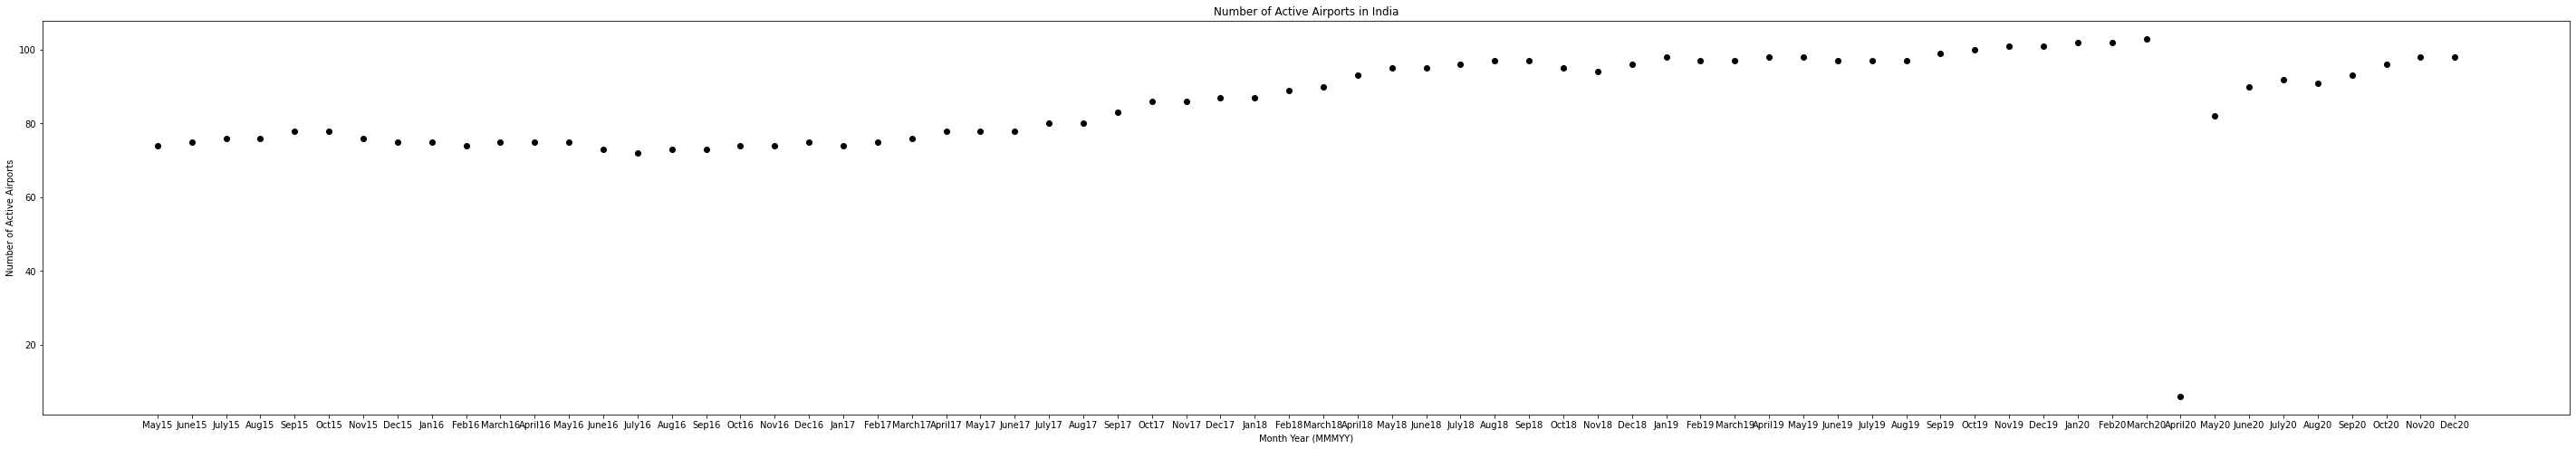

In [12]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))
plt.scatter(lbls1, nodes, color="black", marker="o")
plt.xlabel("Month Year (MMMYY)")

plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
# plt.grid(True)

figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

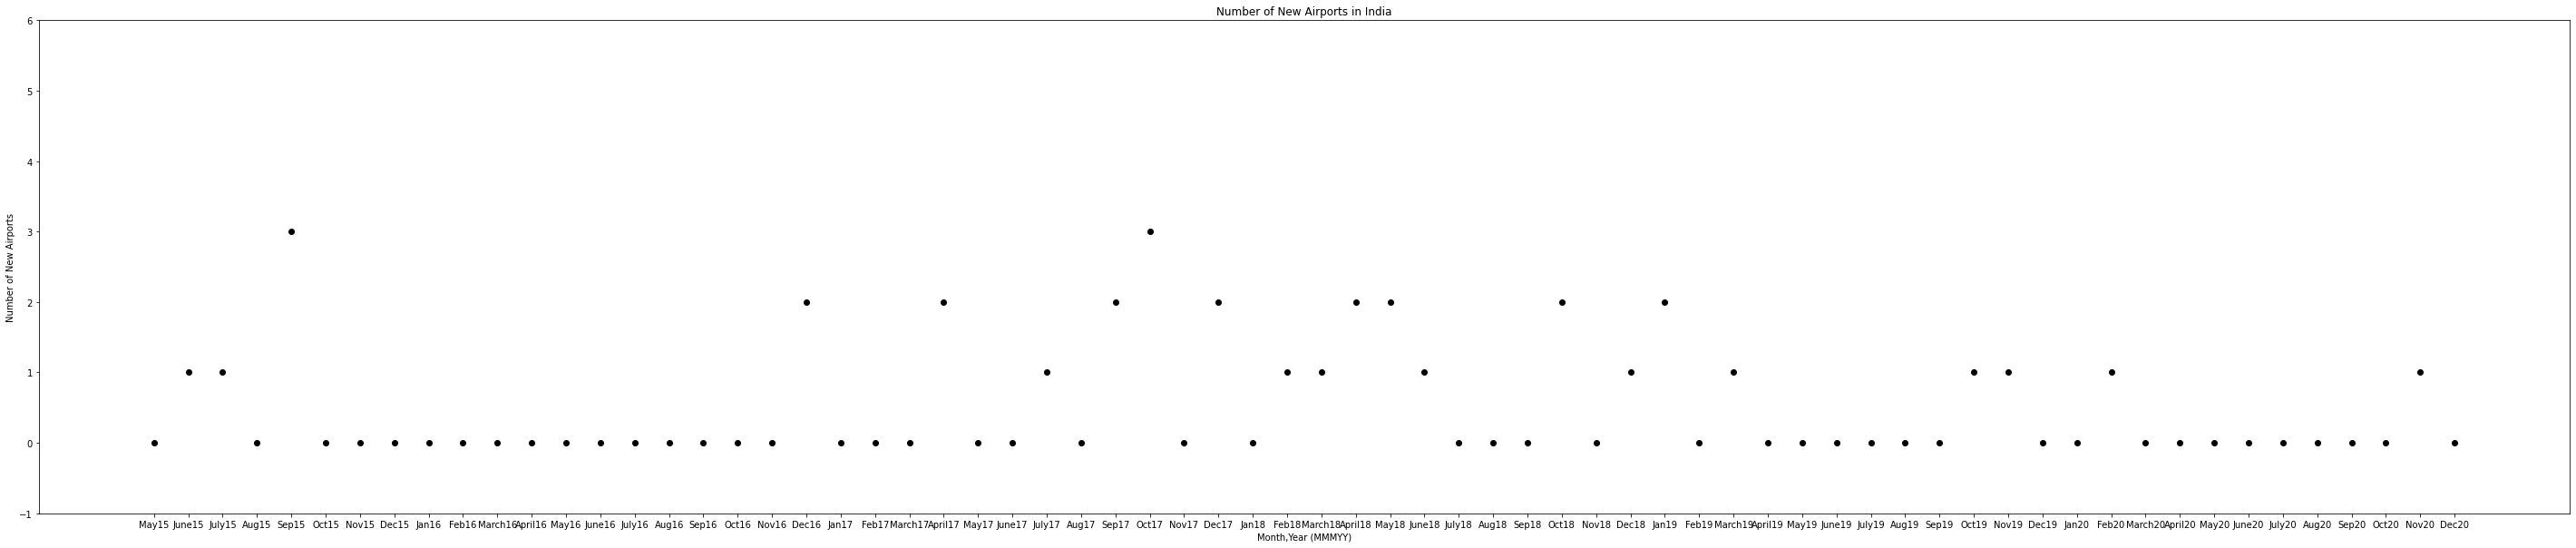

In [13]:
nnodes = []
airpor = {} 
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nnodes.append(temp)
nnodes[0] = 0

plt.scatter(lbls1, nnodes, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
# plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()
plt.clf()
plt.close()


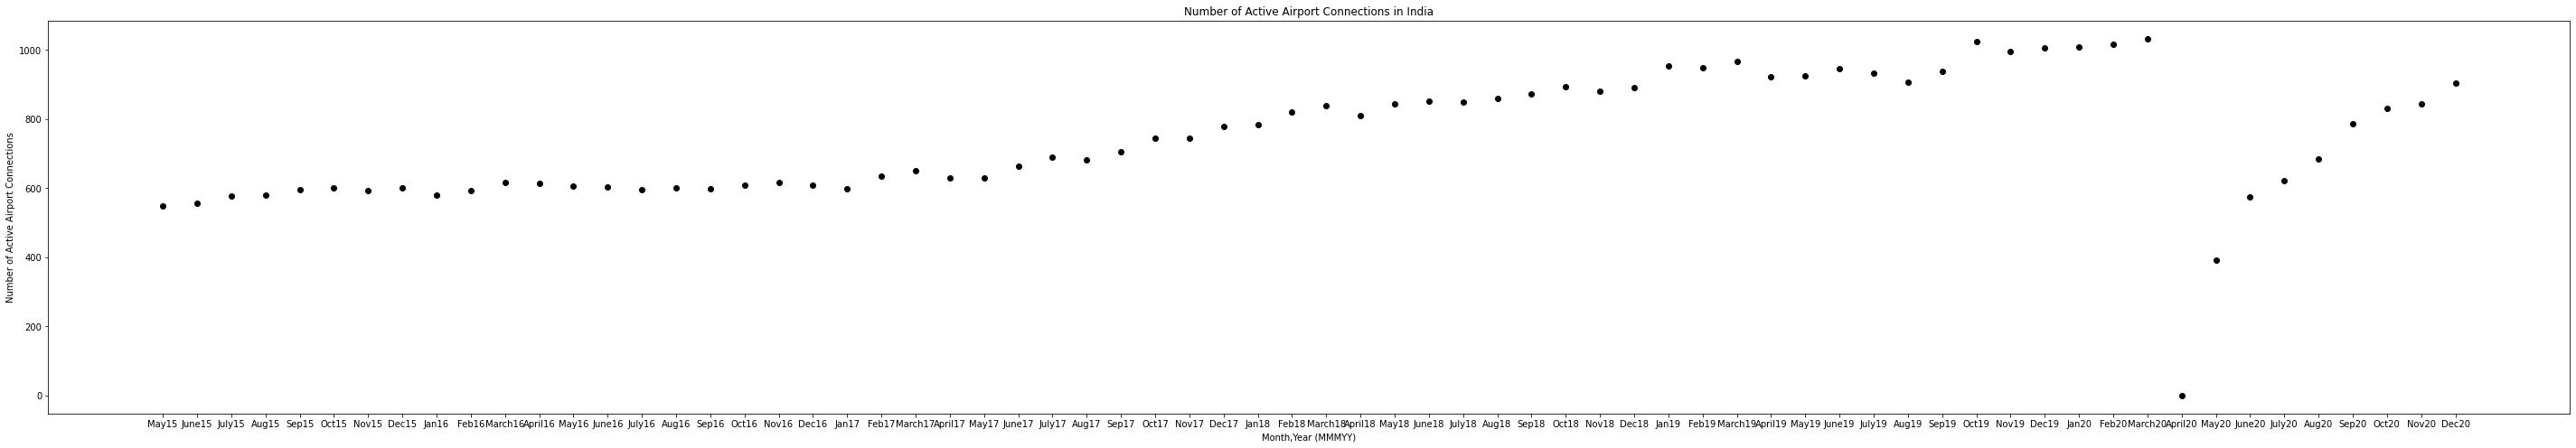

In [14]:
edges = []
for i in range(len(graphs)):
    edges.append(len(graphs[i].edges()))
plt.scatter(lbls1, edges, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of Active Airport Connections")
plt.title("Number of Active Airport Connections in India")
# plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()
plt.clf()
plt.close()

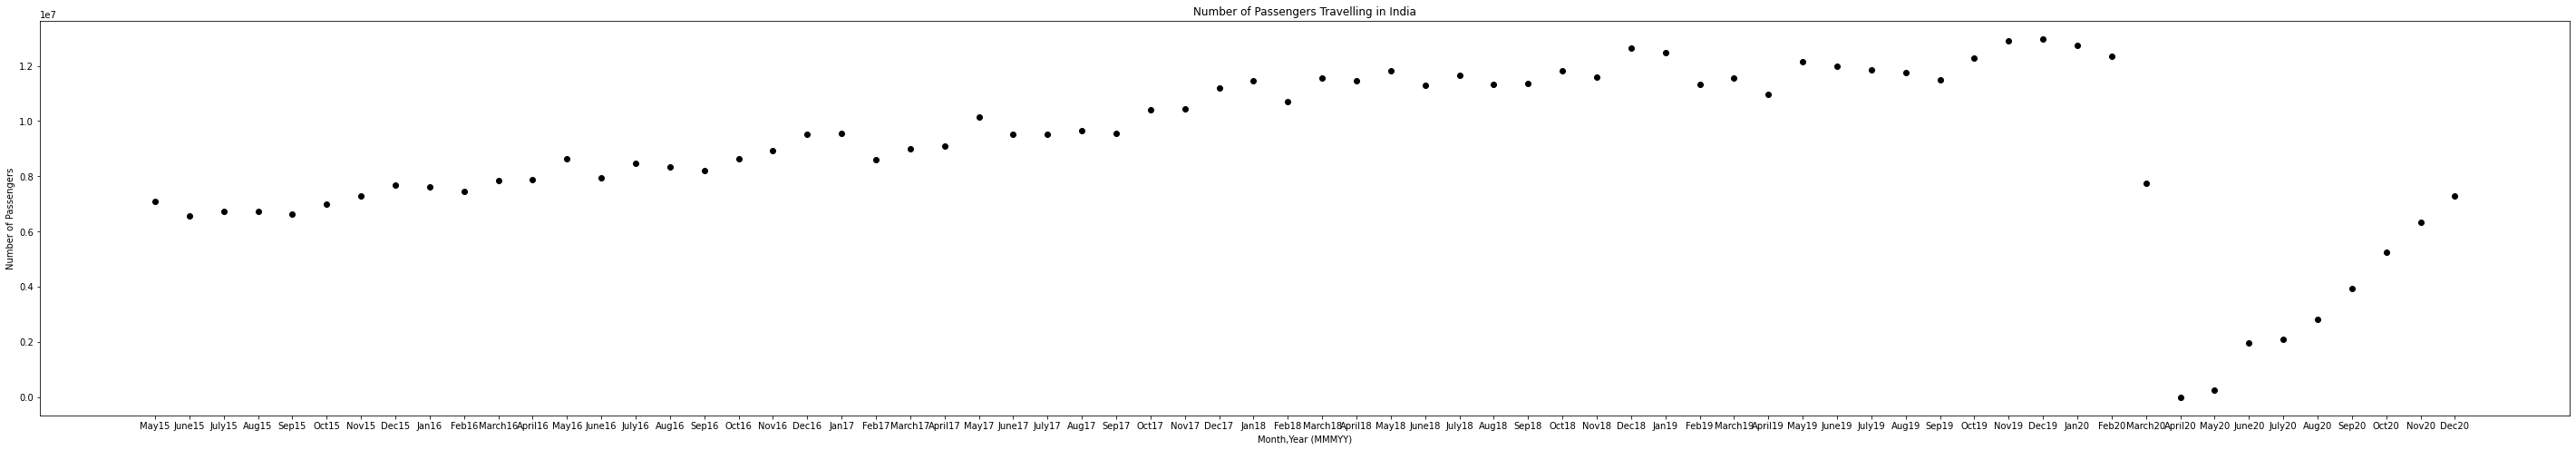

In [15]:
plt.scatter(lbls1, passengers, color="black",  marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)],labels = lbls1)
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Travelling in India")
# plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()
plt.clf()
plt.close()

excel = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0)
tempcity = list(excel["Cities"])
#print(tempcity)
for i in sorted(airpor.keys()):
    if i not in tempcity:
        print(i)

In [16]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    betweenness_dict = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

#     sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("Top 10 nodes")
    
    for i in range(len(sorted_betweenness[:10])):
        print(sorted_betweenness[i][0] + " -> " + str(sorted_betweenness[i][1]))


May15
Top 10 nodes
DELHI -> 0.35088642067808723
MUMBAI -> 0.2462499554394531
KOLKATA -> 0.14229527765486671
BENGALURU -> 0.12847787254179963
CHENNAI -> 0.09071295217128547
GUWAHATI -> 0.06162531447919573
HYDERABAD -> 0.04865761880602063
KOCHI -> 0.0279885766187136
SILCHAR -> 0.0273972602739726
AHMEDABAD -> 0.00892063262925135
June15
Top 10 nodes
DELHI -> 0.347284328962411
MUMBAI -> 0.240014704227033
BENGALURU -> 0.15818270955257266
KOLKATA -> 0.13654468757208485
CHENNAI -> 0.08676250833785078
GUWAHATI -> 0.06227147168927988
HYDERABAD -> 0.04598120625517885
KOCHI -> 0.02760236184893719
SILCHAR -> 0.02702702702702703
AHMEDABAD -> 0.008529895687429935
July15
Top 10 nodes
DELHI -> 0.33858513183513167
MUMBAI -> 0.22533362558362557
BENGALURU -> 0.16823499273499282
KOLKATA -> 0.13308620958620956
CHENNAI -> 0.08914823564823564
GUWAHATI -> 0.061061578061578047
HYDERABAD -> 0.04735814210814211
KOCHI -> 0.028210214210214208
SILCHAR -> 0.02666666666666667
VARANASI -> 0.018153796653796652
Aug15
Top

Top 10 nodes
DELHI -> 0.3697375078797266
MUMBAI -> 0.21348019672200608
HYDERABAD -> 0.12218419387071655
BENGALURU -> 0.09682385142642033
KOLKATA -> 0.09048686707379924
CHENNAI -> 0.07130890244721222
GUWAHATI -> 0.0632748580533391
KOCHI -> 0.026196109191269273
INDORE -> 0.014212364054136204
KHAJURAHO -> 0.012658227848101266
Sep17
Top 10 nodes
DELHI -> 0.3881526211365036
MUMBAI -> 0.2008639387258699
HYDERABAD -> 0.11703813475493695
BENGALURU -> 0.09193585468962266
KOLKATA -> 0.0904179609137295
CHENNAI -> 0.09005681034813828
GUWAHATI -> 0.061537629947985124
KOCHI -> 0.025339475757271593
KHAJURAHO -> 0.012195121951219513
VARANASI -> 0.00714978754725819
Oct17
Top 10 nodes
DELHI -> 0.3868535798157648
MUMBAI -> 0.19500025010003996
HYDERABAD -> 0.1447209396579144
CHENNAI -> 0.09832419156473775
KOLKATA -> 0.08197666362582326
BENGALURU -> 0.06409792743826358
GUWAHATI -> 0.05872495482264389
KOCHI -> 0.02480314853214012
JAIPUR -> 0.011932166806116383
KHAJURAHO -> 0.011764705882352941
Nov17
Top 10 

Top 10 nodes
DELHI -> 0.3004775012986095
MUMBAI -> 0.18929624412259105
BENGALURU -> 0.12626545663891467
KOLKATA -> 0.12230759410048259
HYDERABAD -> 0.1082019677469551
CHENNAI -> 0.06773797987265164
AHMEDABAD -> 0.041482085114725
GUWAHATI -> 0.024971958102566034
DEHRA DUN -> 0.02337535268751846
JAIPUR -> 0.023120821986997518
Dec19
Top 10 nodes
DELHI -> 0.29510150045322
MUMBAI -> 0.18616953327197938
BENGALURU -> 0.1269805307370882
KOLKATA -> 0.11702156327469851
HYDERABAD -> 0.10889042522381517
CHENNAI -> 0.06839940235293383
AHMEDABAD -> 0.04854809431376554
GUWAHATI -> 0.03043069431189349
JAIPUR -> 0.025278222821463976
DEHRA DUN -> 0.023356598806004627
Jan20
Top 10 nodes
DELHI -> 0.29760778777877034
MUMBAI -> 0.16986625176670753
BENGALURU -> 0.12167532491877861
HYDERABAD -> 0.10899352729986823
KOLKATA -> 0.09063959353321241
AHMEDABAD -> 0.0829694873052305
CHENNAI -> 0.0747925616293193
GUWAHATI -> 0.05682827189373237
DEHRA DUN -> 0.022874612855597127
JAIPUR -> 0.022685307897305558
Feb20
To

April20
{'2015-05-01': -0.5272812206206406, '2015-06-01': -0.5317350274510818, '2015-07-01': -0.5262405813964762, '2015-08-01': -0.5232407383515173, '2015-09-01': -0.5391388879882293, '2015-10-01': -0.5303208579477607, '2015-11-01': -0.525004655472408, '2015-12-01': -0.5421556462374968, '2016-01-01': -0.535574846787293, '2016-02-01': -0.5226373743711222, '2016-03-01': -0.5182753523143475, '2016-04-01': -0.5060782208907407, '2016-05-01': -0.5097836588533134, '2016-06-01': -0.5103966118593446, '2016-07-01': -0.5038931031701279, '2016-08-01': -0.4981716506150246, '2016-09-01': -0.5077600885280485, '2016-10-01': -0.5122172164780205, '2016-11-01': -0.5140104008074059, '2016-12-01': -0.5093456014534163, '2017-01-01': -0.5156092267895516, '2017-02-01': -0.49913513447895813, '2017-03-01': -0.48651574428441696, '2017-04-01': -0.5050275841039462, '2017-05-01': -0.5157438533952853, '2017-06-01': -0.4863507139610476, '2017-07-01': -0.4722133120081105, '2017-08-01': -0.48139507415044047, '2017-09-0

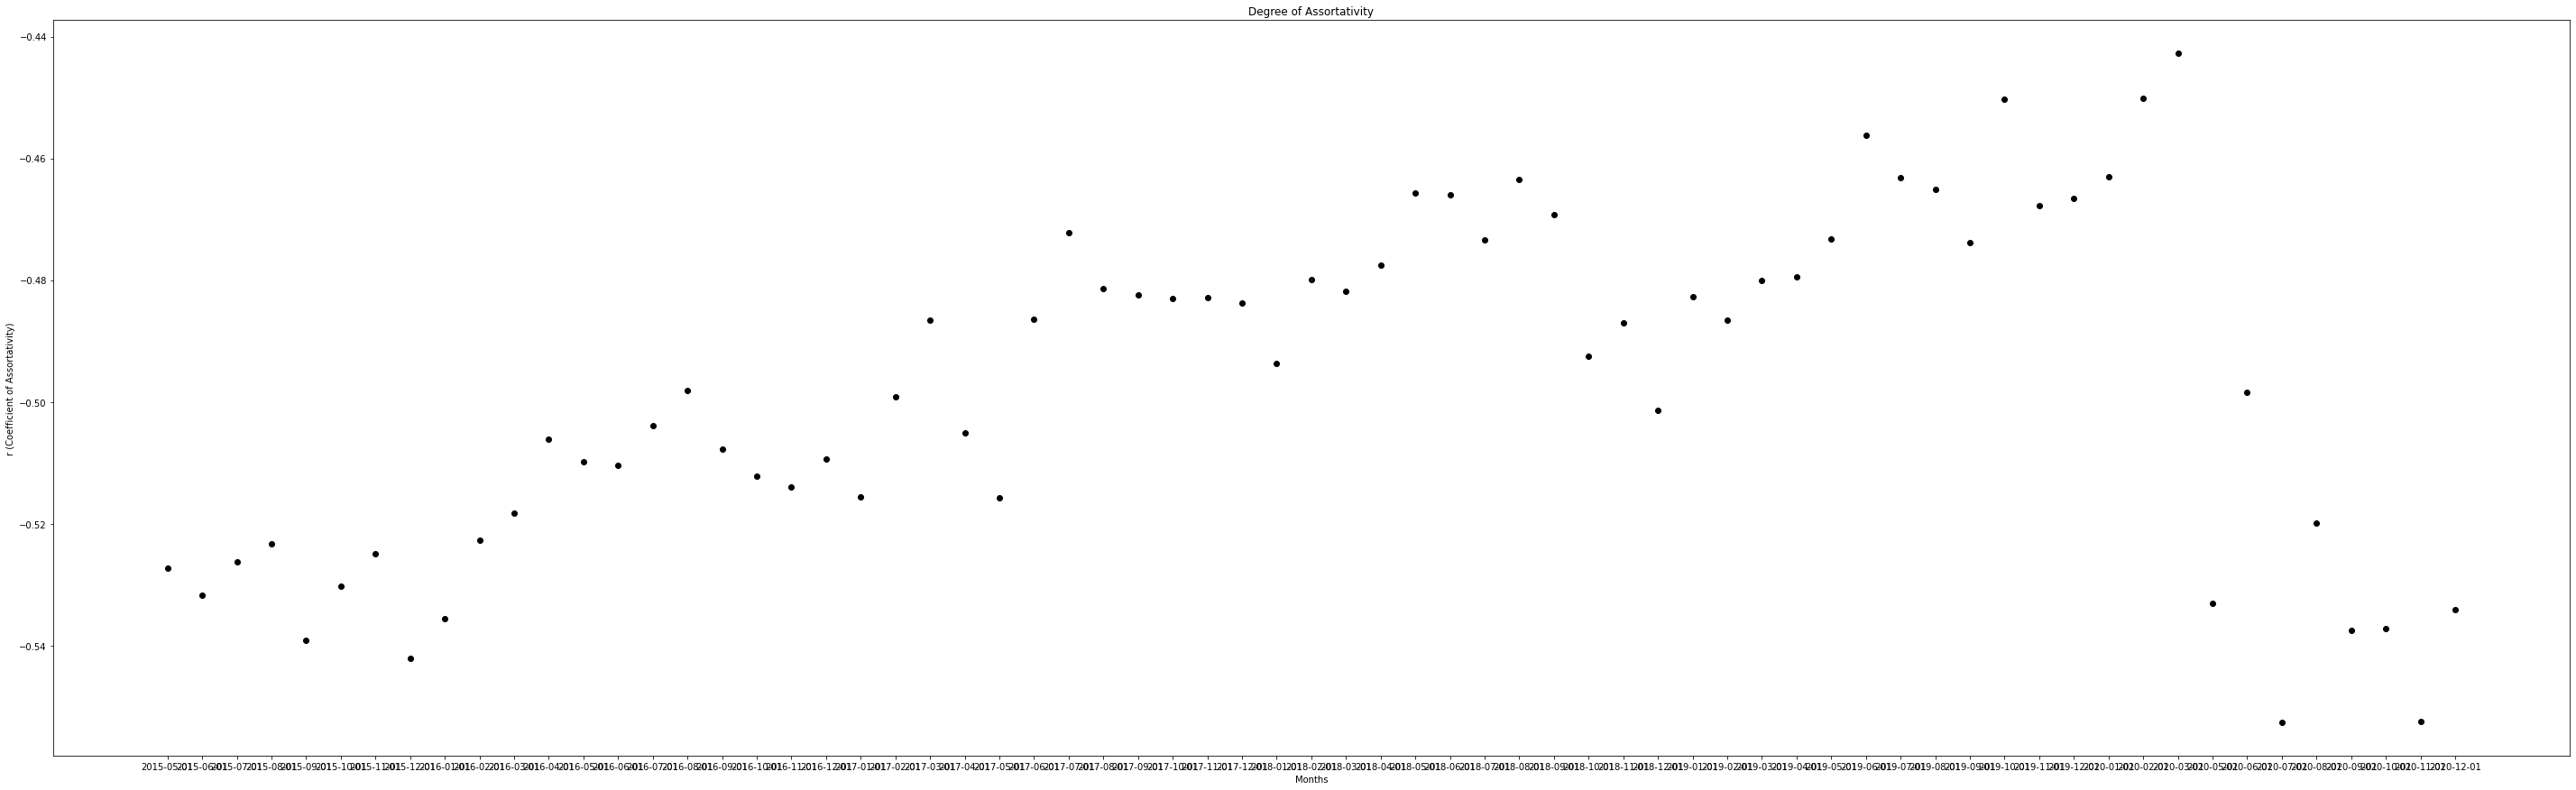

In [17]:
assortativity = {}
for i in range(len(graphs)):
    G = graphs[i]
    try:
        pearson = nx.degree_pearson_correlation_coefficient(G)
        assortativity[lbls2[i]] = pearson
    except:
        print(lbls1[i])
print(assortativity)

plt.figure(figsize = (50, 15)) 
# plt.bar(range(len(assortativity)), list(assortativity.values()), align='center')
plt.scatter(range(len(assortativity)), list(assortativity.values()), color="black",  marker="o")
plt.title("Degree of Assortativity")
plt.xlabel("Months")
plt.ylabel("r (Coefficient of Assortativity)")
plt.xticks(range(len(assortativity)), list(assortativity.keys()))
plt.savefig('Output_Files/matplotlib/Assortativity')
plt.show()

Degree Distribution

May15


Average clustering coefficient for May15 is 0.6498709231340716
June15


Average clustering coefficient for June15 is 0.6434613629926142
July15


Average clustering coefficient for July15 is 0.6136858940651846
Aug15


Average clustering coefficient for Aug15 is 0.6425104965289116
Sep15


Average clustering coefficient for Sep15 is 0.6937912813593201
Oct15


Average clustering coefficient for Oct15 is 0.6373241272214337
Nov15


Average clustering coefficient for Nov15 is 0.6046984457370973
Dec15


Average clustering coefficient for Dec15 is 0.6894202575685523
Jan16


Average clustering coefficient for Jan16 is 0.69369373832812
Feb16


Average clustering coefficient for Feb16 is 0.6966290773198501
March16


Average clustering coefficient for March16 is 0.6595565049614662
April16


Average clustering coefficient for April16 is 0.6321229251222374
May16


Average clustering coefficient for May16 is 0.6319548680423022
June16


Average clustering coefficient for June16 is 0.63632814176

<ipython-input-18-2e0fce89c828>:75: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig('Output_Files/matplotlib/Cum_Degree_Dist/ ' + lbls1[gi])
<ipython-input-18-2e0fce89c828>:94: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig('Output_Files/matplotlib/Ck_plots/ ' + lbls1[gi])


Average clustering coefficient for April20 is 0.0
May20


Average clustering coefficient for May20 is 0.5005764888525713
June20


Average clustering coefficient for June20 is 0.6027726144275517
July20


Average clustering coefficient for July20 is 0.677371907272084
Aug20


Average clustering coefficient for Aug20 is 0.635837175733831
Sep20


Average clustering coefficient for Sep20 is 0.7251840703446114
Oct20


Average clustering coefficient for Oct20 is 0.6834669876143319
Nov20


Average clustering coefficient for Nov20 is 0.6916096150211223
Dec20


Average clustering coefficient for Dec20 is 0.7105132586529491


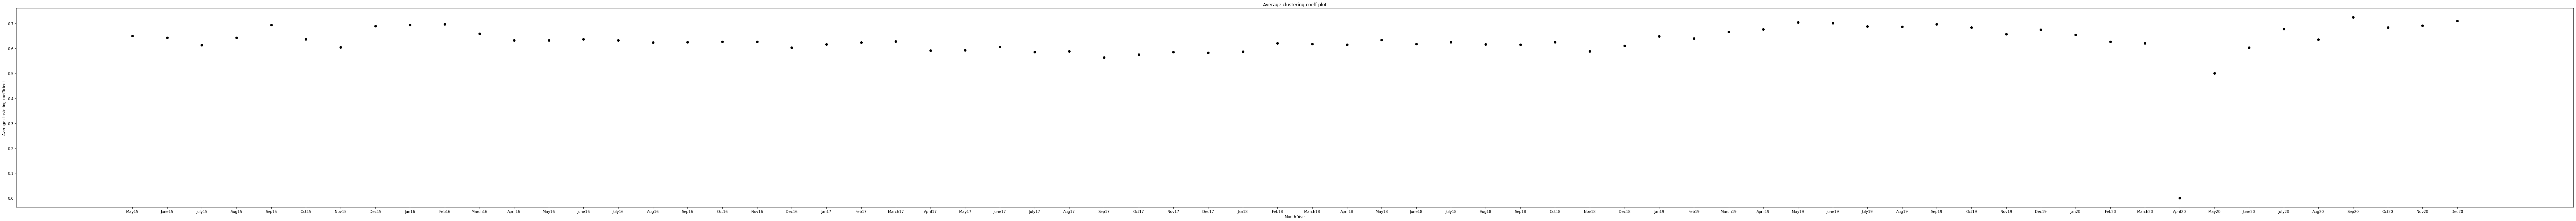

6568

In [18]:
avg_clust_coeff_list = []
def haha(gi):
    print(lbls1[gi])
    G = graphs[gi]
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
   
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    
    plt.figure(figsize = (100, 10))
    plt.scatter([y[0] for y in sorted_degree], [y[1] for y in sorted_degree], color="black",  marker="o")
    plt.title("Degree sequence for " + lbls1[gi])
    plt.xticks([i for i in range(len(sorted_degree))],labels =[x[0][:10] for x in sorted_degree] )
    plt.grid(True)
    plt.savefig('Output_Files/matplotlib/Degree/ ' + lbls1[gi])
#     plt.show()
    plt.clf()
    plt.close("all")
    print("\n")
    gc.collect()
    
    
    
    
    clust_coefficients = nx.clustering(G)
    sorted_clust_coefficients = dict(sorted(clust_coefficients.items(), key=itemgetter(1), reverse=True))
    
    
    plt.figure(figsize=(100, 10))
    plt.title("Clustering plot for " + lbls1[gi])
    plt.scatter(sorted_clust_coefficients.keys(), sorted_clust_coefficients.values(), color="black",  marker="o")
    plt.savefig('Output_Files/matplotlib/Clust_seq/ ' + lbls1[gi])
#     plt.show()
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    avg_clust_coeff = sum(clust_coefficients.values()) / len(clust_coefficients)  
    avg_clust_coeff_list.append(avg_clust_coeff)
    
    
    
    plt.figure(figsize = (100, 10))
    plt.title("Degree distribution for " + lbls1[gi])
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)    
    degree_counter = collections.Counter(degree_dict.values())
    degree_counter = dict(sorted(degree_counter.items(), key=itemgetter(0)))
    plt.scatter(degree_counter.keys(), degree_counter.values(), color="black",  marker="o")
#     for key in degree_counter.keys():
#         plt.plot(key, degree_counter[key], color="red",  marker="o")
    plt.xticks([t for t in range(max(degree_counter.keys())+1)])        
#     plt.show()
    plt.savefig('Output_Files/matplotlib/Degree_Dist/ ' + lbls1[gi])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    cum_degree = {}
    for i in range(len(degree_counter)):
        cum_degree[list(degree_counter.keys())[i]]= sum(list(degree_counter.values())[i:])/sum(list(degree_counter.values()))
#     print(cum_degree)
   
    plt.figure()
    plt.title("Cumulative degree distribution for " + lbls1[gi])
    plt.xlabel("Degree(k)")
    plt.ylabel("P(>k)")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")    
    plt.scatter(cum_degree.keys(), cum_degree.values(), color="black",  marker="o")    
    plt.savefig('Output_Files/matplotlib/Cum_Degree_Dist/ ' + lbls1[gi])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    
    plt.figure()
#     TODO: increase figsize
    plt.title("Clustering coeff vs Degree plot for " + lbls1[gi])
    plt.xlabel("Degree")
    plt.ylabel("Clustering coefficient")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")

    for city in clust_coefficients.keys():
        plt.plot(degree_dict[city], clust_coefficients[city], color="black",  marker="o", markersize=0.5)

    plt.savefig('Output_Files/matplotlib/Ck_plots/ ' + lbls1[gi])
    plt.clf()
    plt.close()
    gc.collect()
    plt.close('all')     
    
    print("Average clustering coefficient for", lbls1[gi], "is", avg_clust_coeff)
    
    
for gi in range(len(graphs)):
    plt.ioff()
    haha(gi)
    gc.collect()

    
plt.figure(figsize = (125, 10))
plt.title("Average clustering coeff plot")
plt.xlabel("Month Year")
plt.ylabel("Average clustering coefficient")
# plt.grid(True)
plt.scatter(lbls1, avg_clust_coeff_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Average CLustering Coeff ')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



In [19]:
# # TODO: plots for in and out degree
# for G in graphs:
#     in_degree_freq = nx.degree_histogram(G)
#     out_degree_freq = nx.degree_histogram(G, out_degree=True)
#     degrees = range(len(in_degree_freq))
#     plt.figure(figsize=(12, 8)) 
#     plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
#     plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
#     plt.xlabel('Degree')
#     plt.ylabel('Frequency')
#     plt.show()
#     plt.close()
#     plt.clf()


{1: 548, 2: 3669, 3: 1107, 4: 78}
Characteristic Path length for 1505  is  2.1323583857830433


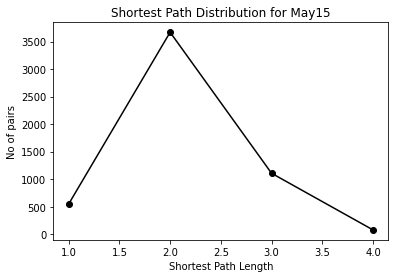



{1: 556, 2: 3747, 3: 1166, 4: 81}
Characteristic Path length for 1506  is  2.139099099099099


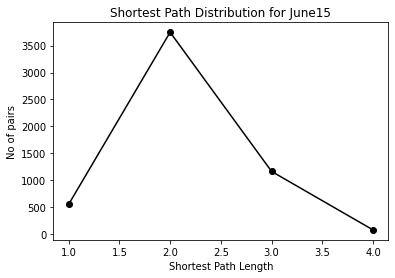



{1: 578, 2: 3784, 3: 1228, 4: 108, 5: 2}
Characteristic Path length for 1507  is  2.152982456140351


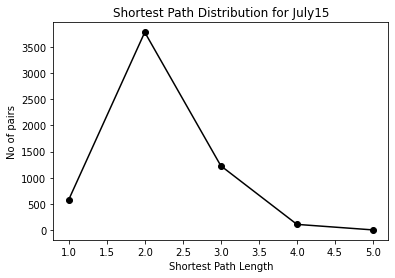



{1: 580, 2: 3824, 3: 1140, 4: 81}
Characteristic Path length for 1508  is  2.1003508771929824


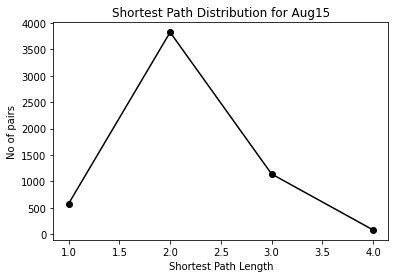



{1: 596, 2: 4221, 3: 1168, 4: 21}
Characteristic Path length for 1509  is  2.1022311022311024


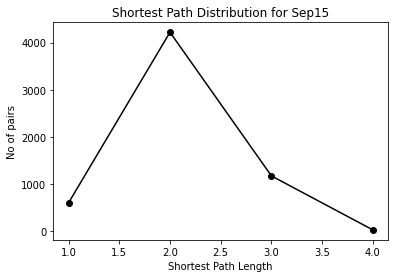



{1: 602, 2: 4076, 3: 1229, 4: 98, 5: 1}
Characteristic Path length for 1510  is  2.1375291375291376


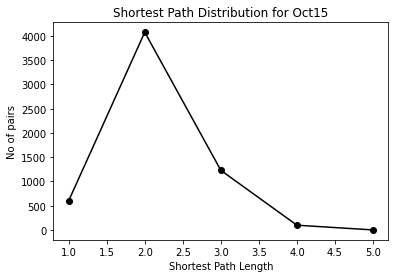



{1: 594, 2: 3874, 3: 1137, 4: 94, 5: 1}
Characteristic Path length for 1511  is  2.1287719298245613


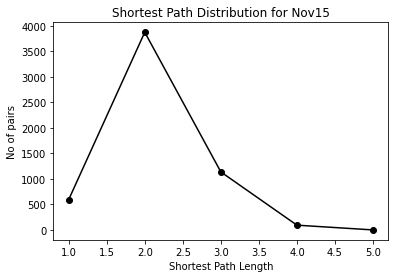



{1: 601, 2: 3952, 3: 906, 4: 17}
Characteristic Path length for 1512  is  2.0344144144144143


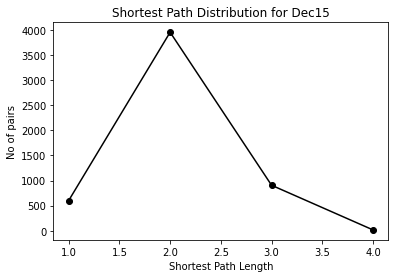



{1: 581, 2: 3970, 3: 909, 4: 16}
Characteristic Path length for 1601  is  2.0381981981981983


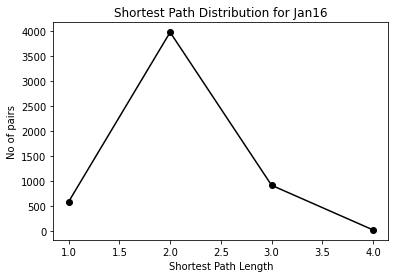



{1: 594, 2: 3924, 3: 868, 4: 16}
Characteristic Path length for 1602  is  2.056645686782673


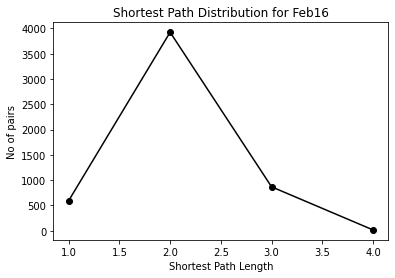



{1: 617, 2: 4042, 3: 875, 4: 16}
Characteristic Path length for 1603  is  2.052252252252252


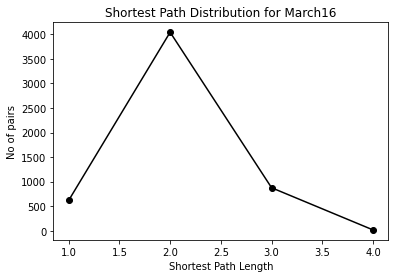



{1: 613, 2: 3787, 3: 868, 4: 60}
Characteristic Path length for 1604  is  1.9875675675675675


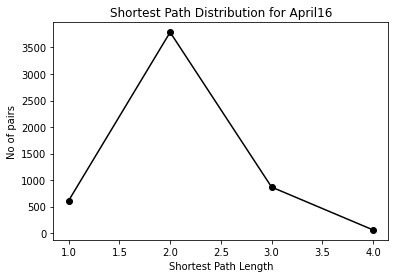



{1: 605, 2: 3818, 3: 855, 4: 50}
Characteristic Path length for 1605  is  1.983063063063063


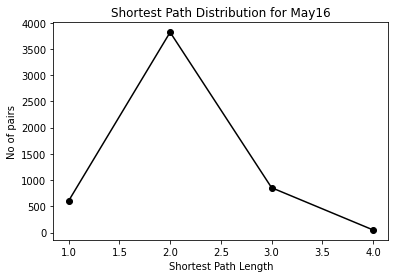



{1: 603, 2: 3672, 3: 730, 4: 35}
Characteristic Path length for 1606  is  1.955289193302892


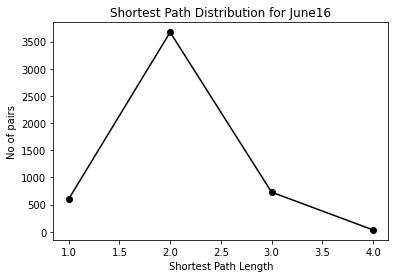



{1: 596, 2: 3554, 3: 714, 4: 35}
Characteristic Path length for 1607  is  1.9534428794992176


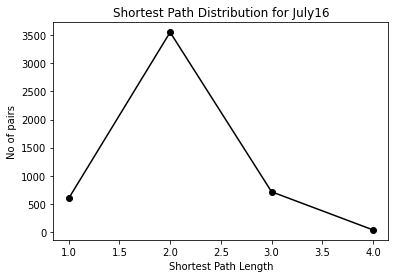



{1: 601, 2: 3643, 3: 929, 4: 82, 5: 1}
Characteristic Path length for 1608  is  2.094178082191781


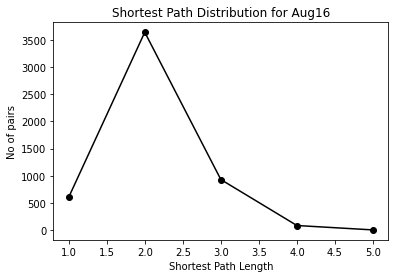



{1: 598, 2: 3665, 3: 912, 4: 80, 5: 1}
Characteristic Path length for 1609  is  2.0907534246575343


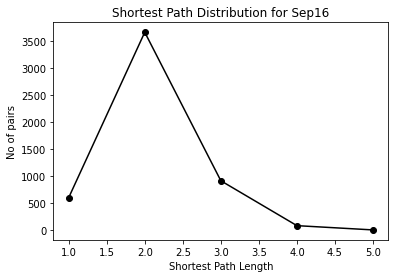



{1: 608, 2: 3672, 3: 842, 4: 60, 5: 1}
Characteristic Path length for 1610  is  1.9850055534987041


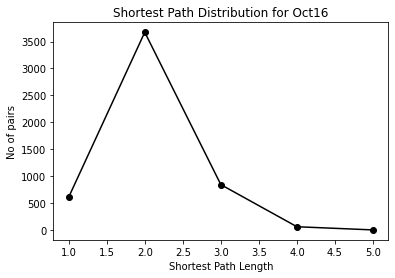



{1: 617, 2: 3734, 3: 1013, 4: 38}
Characteristic Path length for 1611  is  2.087375046279156


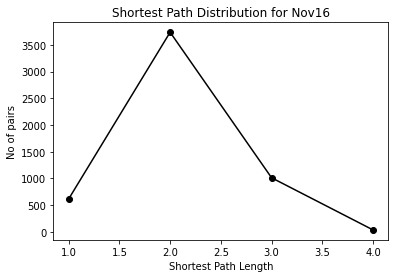



{1: 610, 2: 3847, 3: 1055, 4: 38}
Characteristic Path length for 1612  is  2.093873873873874


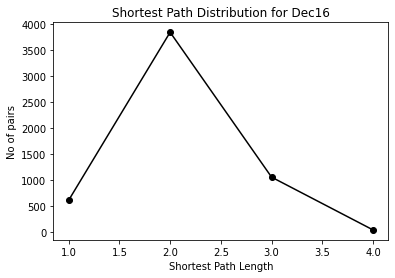



{1: 599, 2: 3829, 3: 955, 4: 19}
Characteristic Path length for 1701  is  2.0729359496482784


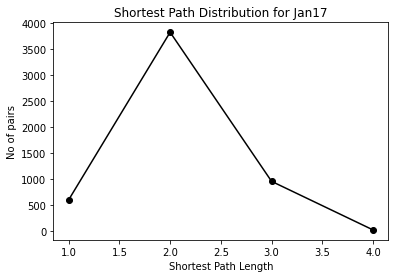



{1: 635, 2: 3970, 3: 927, 4: 18}
Characteristic Path length for 1702  is  2.059099099099099


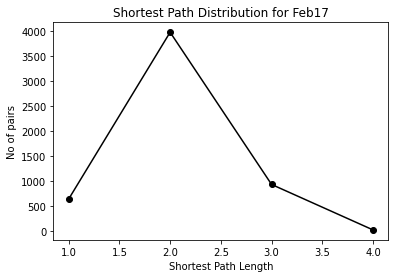



{1: 652, 2: 4092, 3: 940, 4: 16}
Characteristic Path length for 1703  is  2.056140350877193


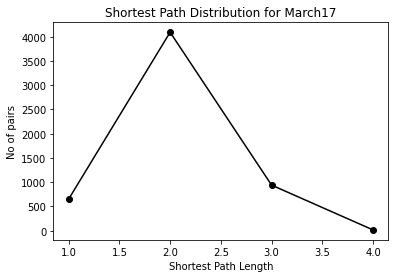



{1: 629, 2: 4215, 3: 1158, 4: 4}
Characteristic Path length for 1704  is  2.089410589410589


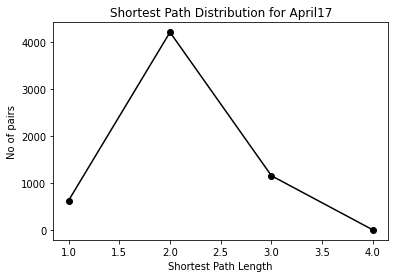



{1: 629, 2: 4251, 3: 1122, 4: 4}
Characteristic Path length for 1705  is  2.083416583416583


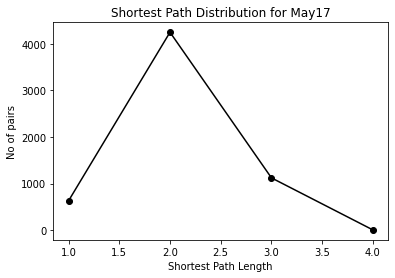



{1: 665, 2: 4190, 3: 1128, 4: 23}
Characteristic Path length for 1706  is  2.084748584748585


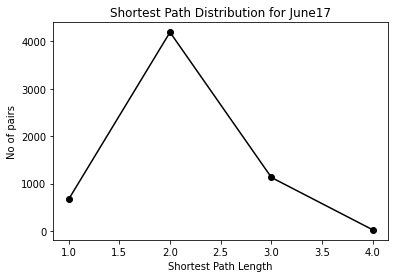



{1: 690, 2: 4381, 3: 1224, 4: 25}
Characteristic Path length for 1707  is  2.0924050632911393


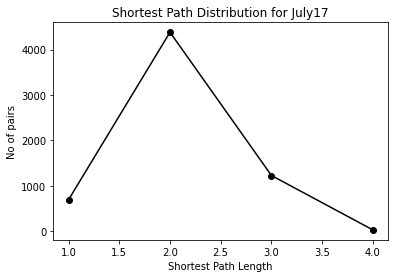



{1: 681, 2: 4314, 3: 1299, 4: 26}
Characteristic Path length for 1708  is  2.106012658227848


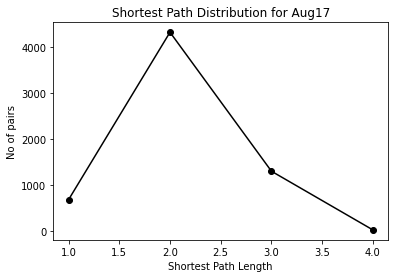



{1: 706, 2: 4659, 3: 1418, 4: 23}
Characteristic Path length for 1709  is  2.1113723185424624


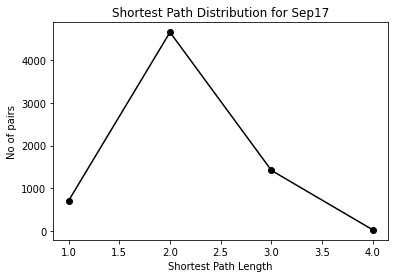



{1: 746, 2: 5029, 3: 1513, 4: 22}
Characteristic Path length for 1710  is  2.1109439124487004


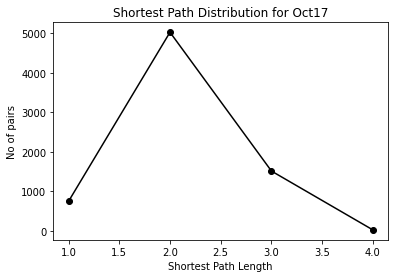



{1: 744, 2: 5076, 3: 1468, 4: 22}
Characteristic Path length for 1711  is  2.105061559507524


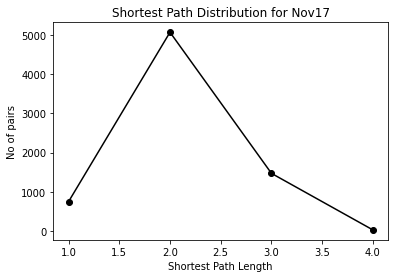



{1: 780, 2: 5219, 3: 1483}
Characteristic Path length for 1712  is  2.0939588345362203


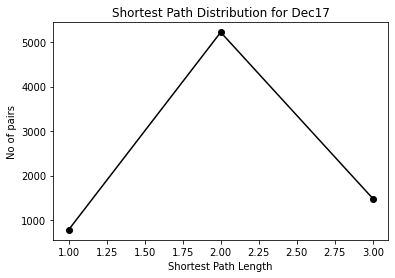



{1: 784, 2: 5235, 3: 1462, 4: 1}
Characteristic Path length for 1801  is  2.090884790163058


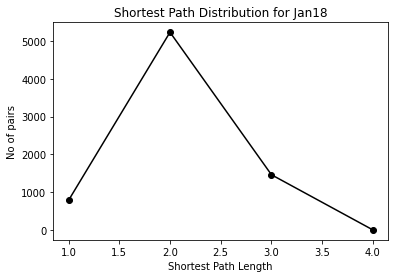



{1: 821, 2: 5440, 3: 1570, 4: 1}
Characteristic Path length for 1802  is  2.095888661899898


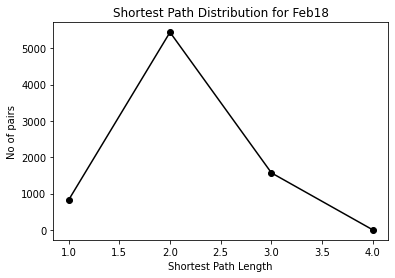



{1: 840, 2: 5581, 3: 1566, 4: 23}
Characteristic Path length for 1803  is  2.096379525593009


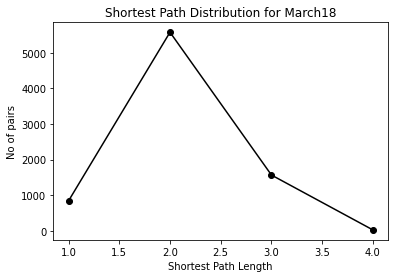



{1: 810, 2: 5966, 3: 1753, 4: 27}
Characteristic Path length for 1804  is  2.116526414212249


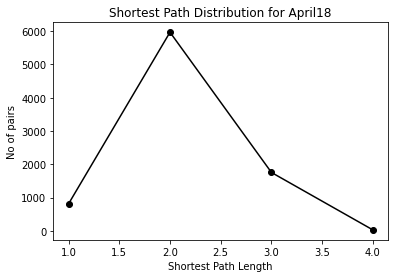



{1: 845, 2: 6303, 3: 1757, 4: 25}
Characteristic Path length for 1805  is  2.107726763717805


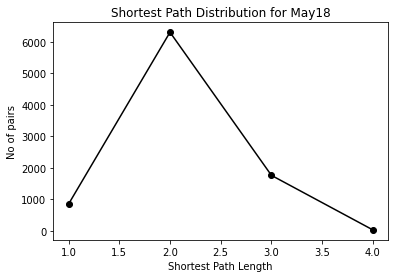



{1: 852, 2: 6216, 3: 1836, 4: 26}
Characteristic Path length for 1806  is  2.116013437849944


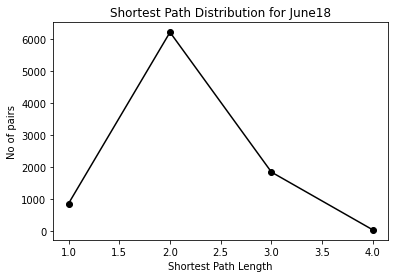



{1: 849, 2: 6295, 3: 1919, 4: 57}
Characteristic Path length for 1807  is  2.1298245614035087


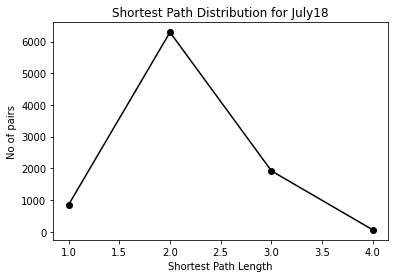



{1: 861, 2: 6325, 3: 2067, 4: 59}
Characteristic Path length for 1808  is  2.1421821305841924


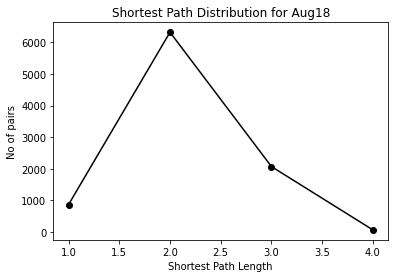



{1: 873, 2: 6333, 3: 2048, 4: 58}
Characteristic Path length for 1809  is  2.138638316151203


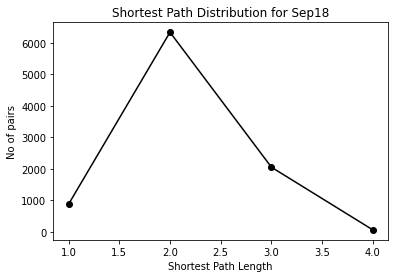



{1: 894, 2: 6406, 3: 1630}
Characteristic Path length for 1810  is  2.0824188129899217


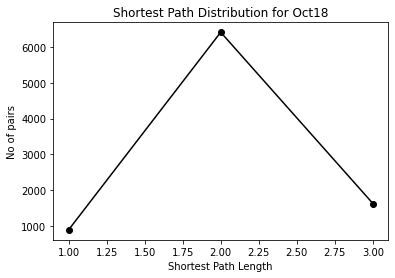



{1: 881, 2: 6074, 3: 1510}
Characteristic Path length for 1811  is  2.008579272477694


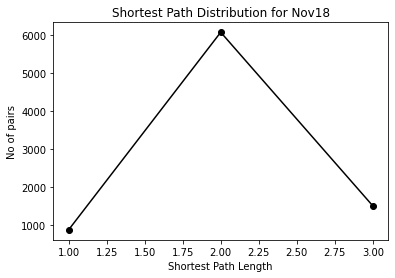



{1: 891, 2: 6326, 3: 1620}
Characteristic Path length for 1812  is  2.017872807017544


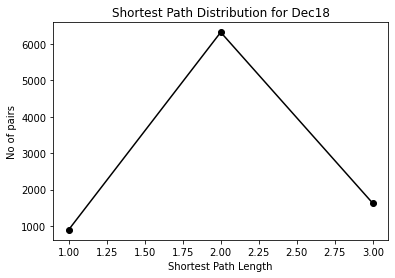



{1: 954, 2: 6648, 3: 1842, 4: 61, 5: 1}
Characteristic Path length for 1901  is  2.106564275194614


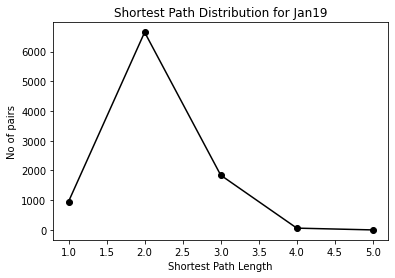



{1: 949, 2: 6393, 3: 1677, 4: 7}
Characteristic Path length for 1902  is  2.0182560137457046


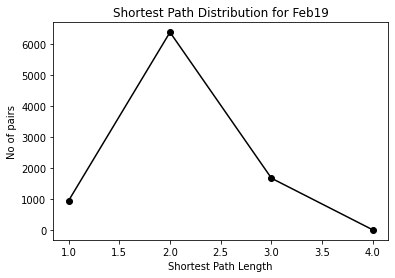



{1: 967, 2: 6584, 3: 1761}
Characteristic Path length for 1903  is  2.085266323024055


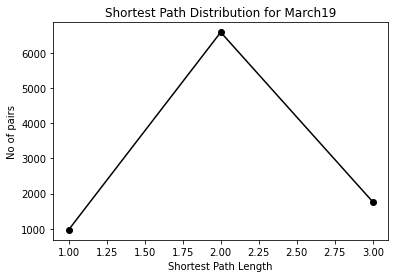



{1: 922, 2: 6586, 3: 1947, 4: 51}
Characteristic Path length for 1904  is  2.118556701030928


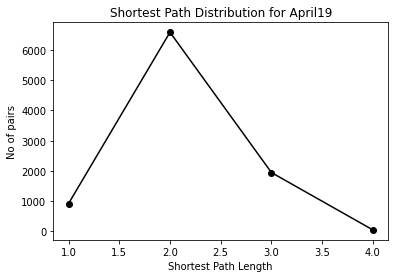



{1: 925, 2: 6610, 3: 1919, 4: 52}
Characteristic Path length for 1905  is  2.115505996212918


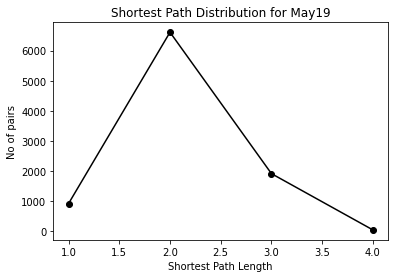



{1: 945, 2: 6528, 3: 1789, 4: 50}
Characteristic Path length for 1906  is  2.1013745704467355


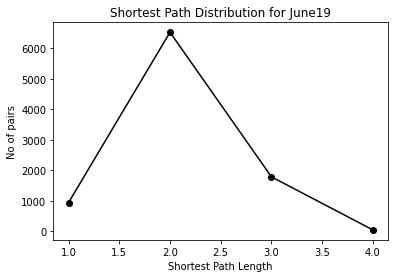



{1: 932, 2: 6494, 3: 1790}
Characteristic Path length for 1907  is  2.071520618556701


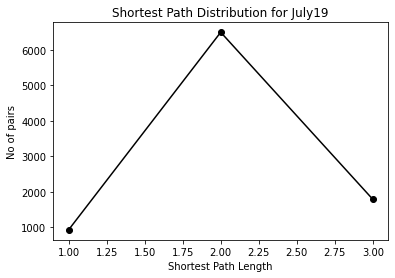



{1: 907, 2: 6584, 3: 1821}
Characteristic Path length for 1908  is  2.098152920962199


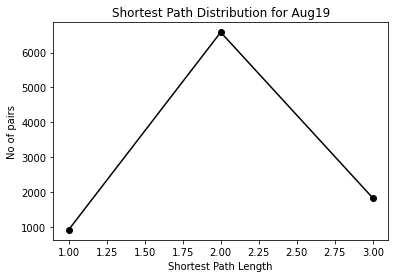



{1: 939, 2: 6830, 3: 1920, 4: 13}
Characteristic Path length for 1909  is  2.103793032364461


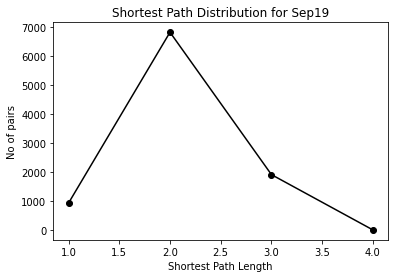



{1: 1025, 2: 6974, 3: 1729, 4: 171, 5: 1}
Characteristic Path length for 1910  is  2.105959595959596


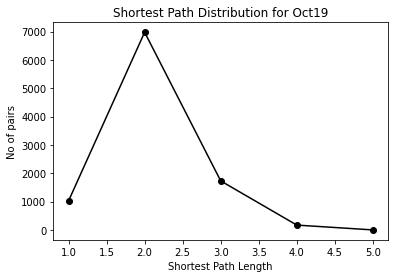



{1: 995, 2: 7084, 3: 1978, 4: 43}
Characteristic Path length for 1911  is  2.1058415841584157


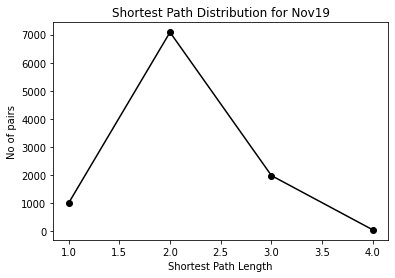



{1: 1005, 2: 7075, 3: 1977, 4: 43}
Characteristic Path length for 1912  is  2.104752475247525


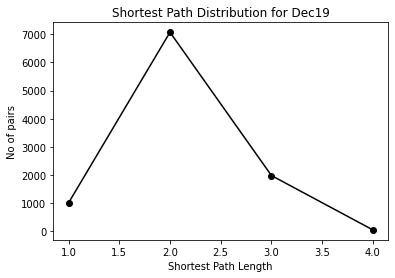



{1: 1008, 2: 7061, 3: 2186, 4: 47}
Characteristic Path length for 2001  is  2.1234711706464764


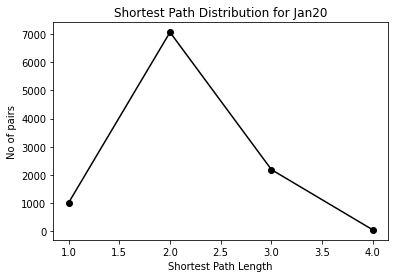



{1: 1017, 2: 7061, 3: 2177, 4: 47}
Characteristic Path length for 2002  is  2.1217239370995924


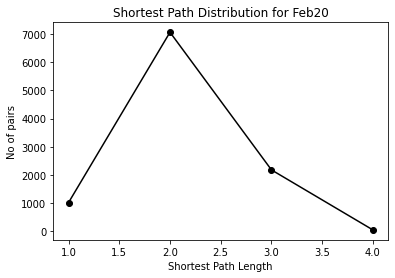



{1: 1033, 2: 7099, 3: 2327, 4: 47}
Characteristic Path length for 2003  is  2.132114981915096


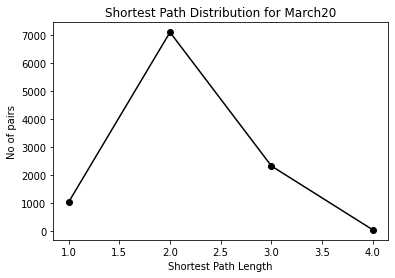



{}
Characteristic Path length for 2004  can't be defined


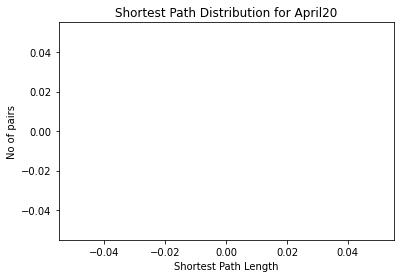



{1: 391, 2: 3617, 3: 2204, 4: 185, 5: 2}
Characteristic Path length for 2005  is  2.256398675097862


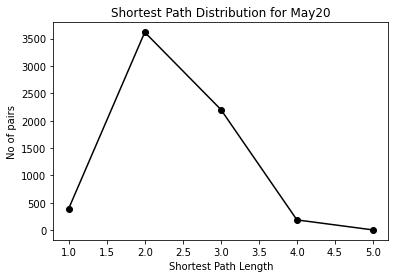



{1: 574, 2: 4600, 3: 2444, 4: 181, 5: 34}
Characteristic Path length for 2006  is  2.247191011235955


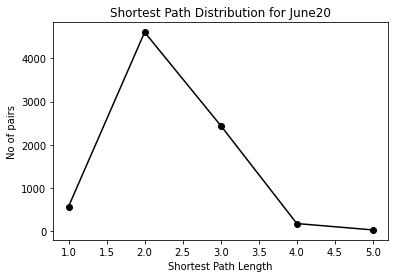



{1: 621, 2: 5319, 3: 2234, 4: 16}
Characteristic Path length for 2007  is  2.153010033444816


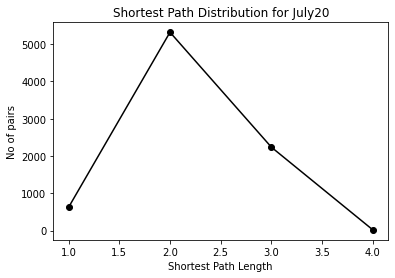



{1: 684, 2: 5330, 3: 1973, 4: 111, 5: 2}
Characteristic Path length for 2008  is  2.163247863247863


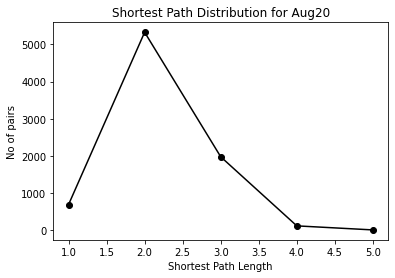



{1: 787, 2: 5909, 3: 1820, 4: 40}
Characteristic Path length for 2009  is  2.130084151472651


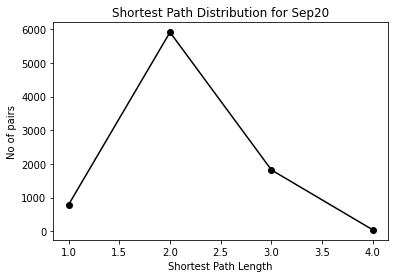



{1: 830, 2: 6286, 3: 1912, 4: 91, 5: 1}
Characteristic Path length for 2010  is  2.138925438596491


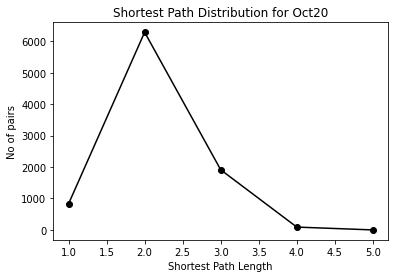



{1: 845, 2: 6713, 3: 1852, 4: 95, 5: 1}
Characteristic Path length for 2011  is  2.1262360614348834


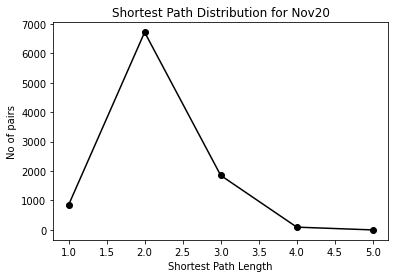



{1: 904, 2: 6815, 3: 1697, 4: 89, 5: 1}
Characteristic Path length for 2012  is  2.1024616031979804


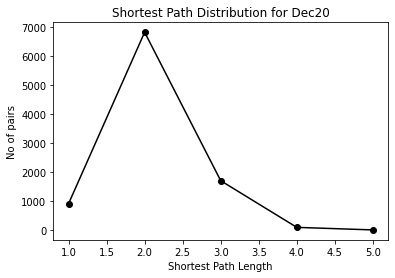

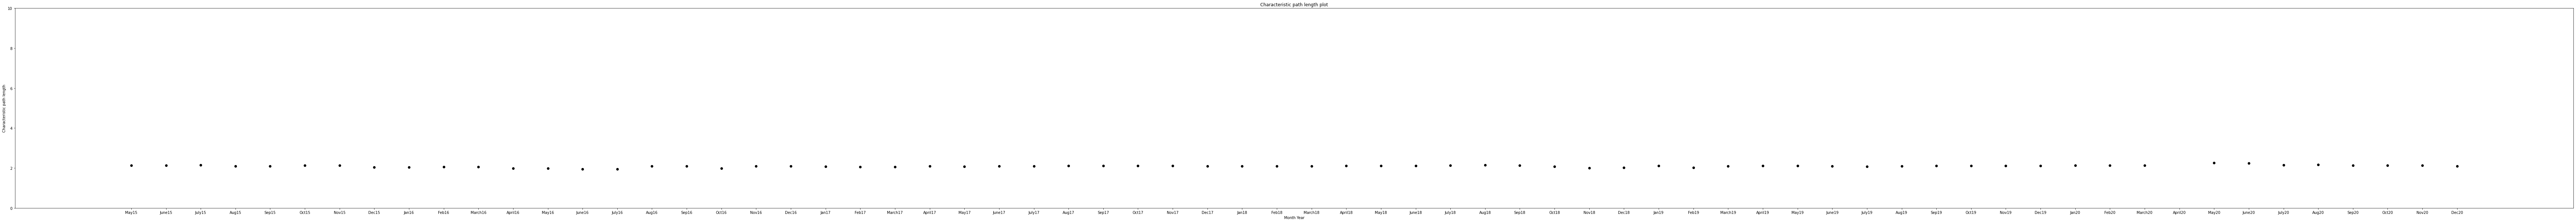

6338

In [20]:
char_path_len_list = []

for i in range(len(graphs)):
    G = graphs[i]
    d_shortest_path = {}
    all_pairs = (nx.all_pairs_shortest_path_length(G,cutoff=None))
    for pair in all_pairs:
#         print(len(pair[1]))
        for dist in pair[1].values():
            if dist != 0:
                if dist in d_shortest_path:
                    d_shortest_path[dist] += 1
                else:
                    d_shortest_path[dist] = 1
                
    print(d_shortest_path)
#     print(sum(d_shortest_path.values()))
    try:
        char_path_len_list.append(nx.average_shortest_path_length(G))
        print("Characteristic Path length for",lbls[i]," is ",char_path_len_list[-1])
#         print("Characteristic Path length for",lbls[i]," is ",nx.average_shortest_path_length(G)) 
    except:
        char_path_len_list.append(None)
        print("Characteristic Path length for",lbls[i]," can't be defined")
        
    plt.figure()
    plt.title("Shortest Path Distribution for " + lbls1[i])
    plt.xlabel("Shortest Path Length")
    plt.ylabel("No of pairs")
    plt.plot(d_shortest_path.keys(),d_shortest_path.values(), color="black",  marker="o")

    plt.savefig('Output_Files/matplotlib/Shortest_Path_Dist/ ' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close()
    print("\n")
    gc.collect()

plt.figure(figsize = (125, 10))
plt.title("Characteristic path length plot")
plt.xlabel("Month Year")
plt.ylabel("Characteristic path length")
plt.ylim(0,10)
plt.scatter(lbls1, char_path_len_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Characteristic path length')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



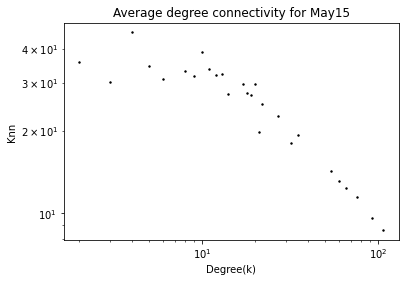

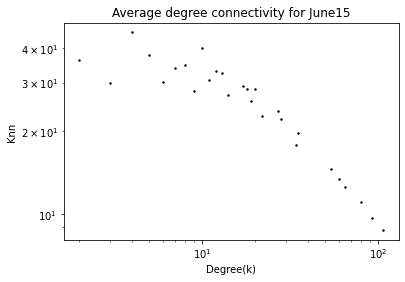

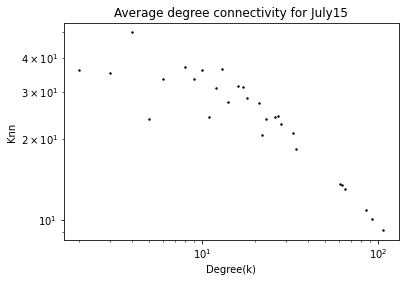

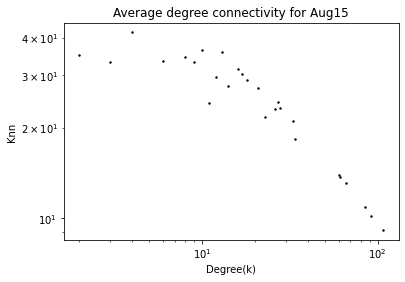

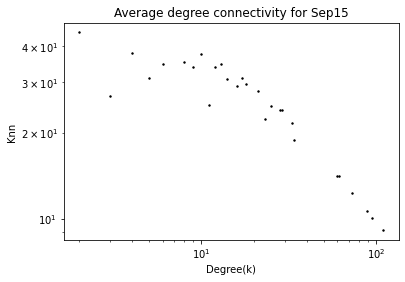

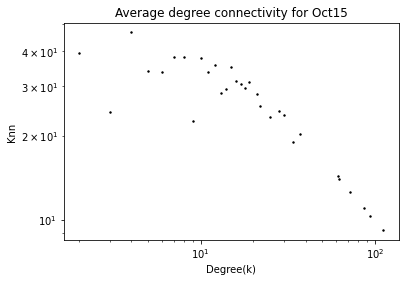

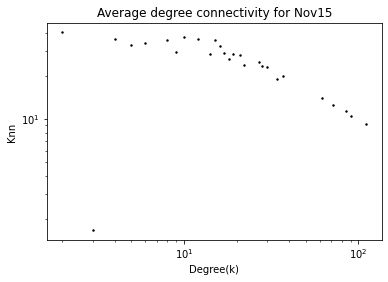

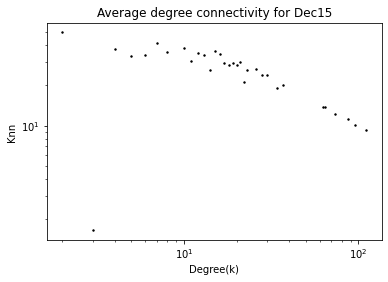

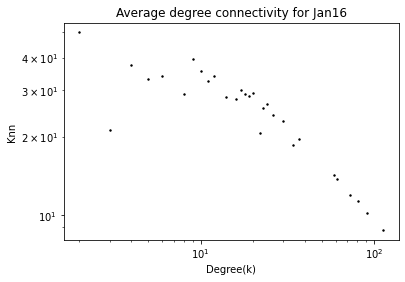

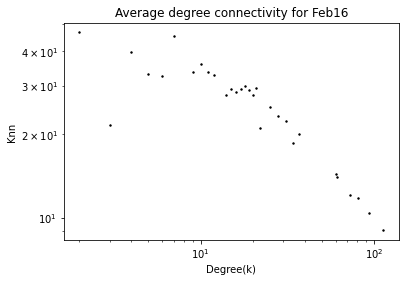

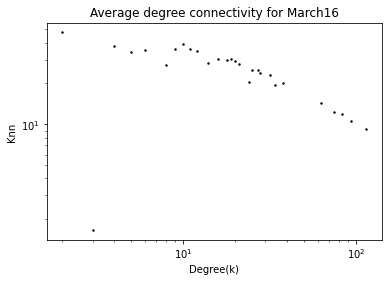

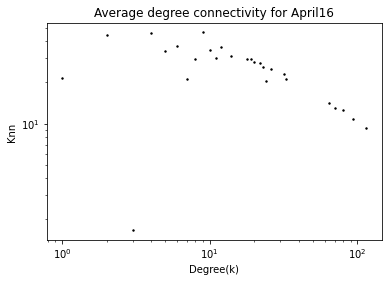

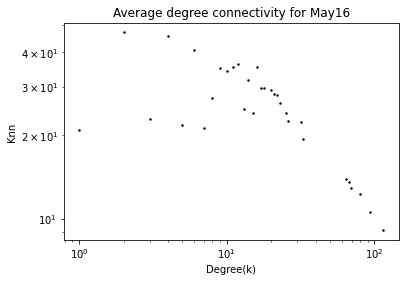

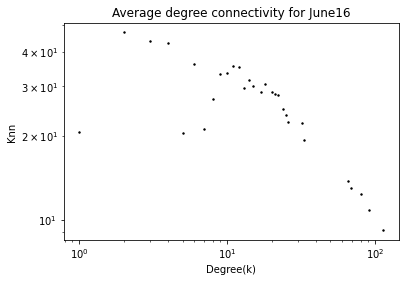

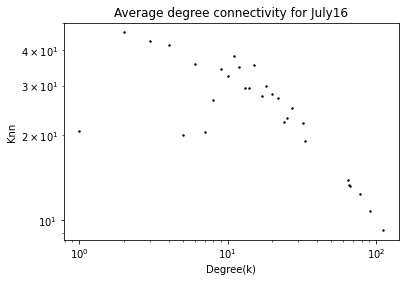

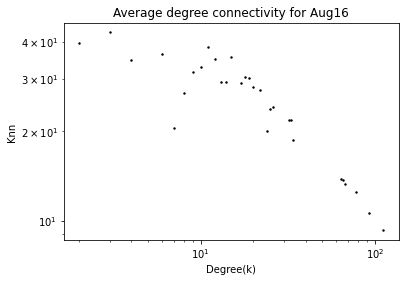

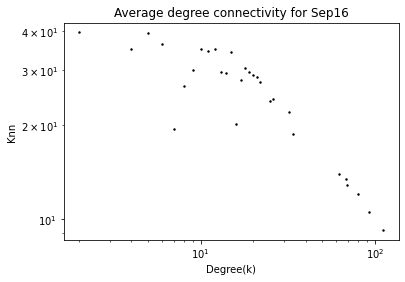

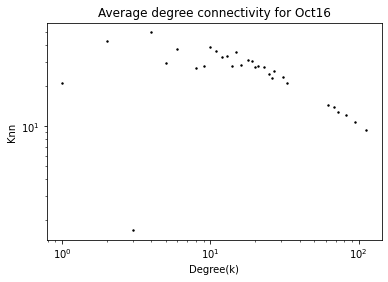

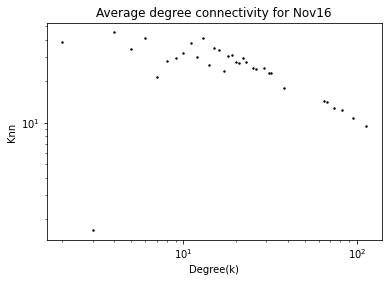

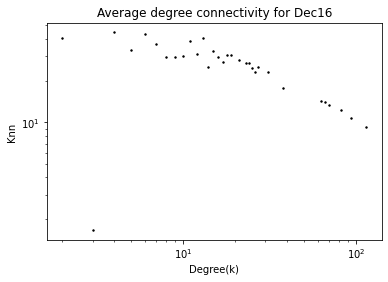

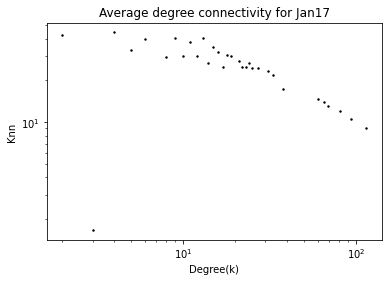

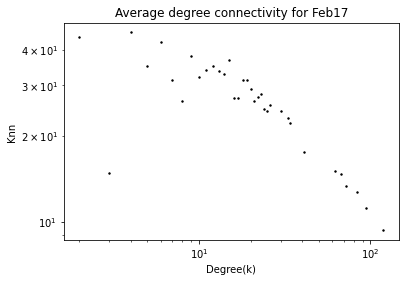

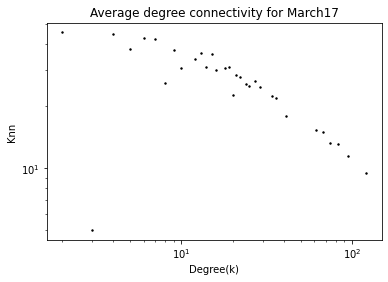

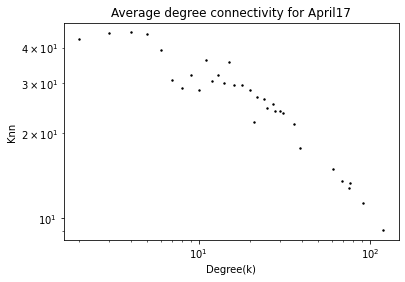

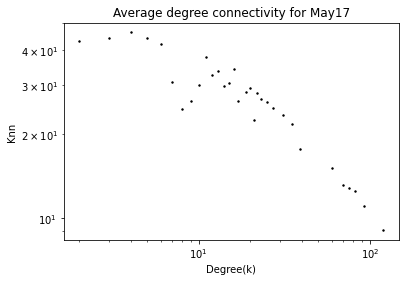

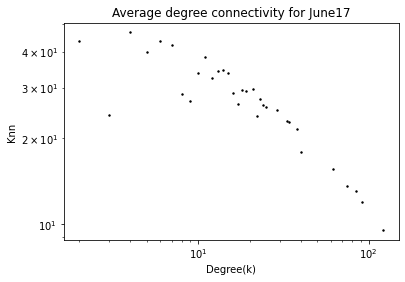

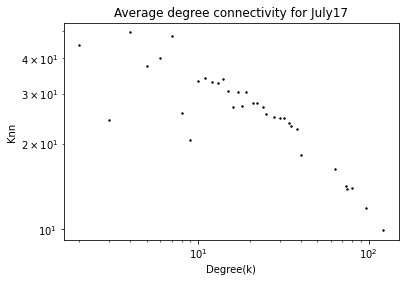

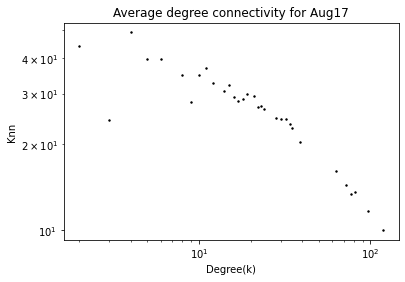

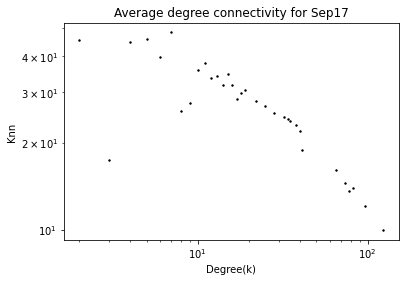

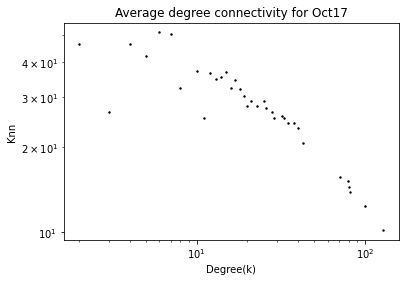

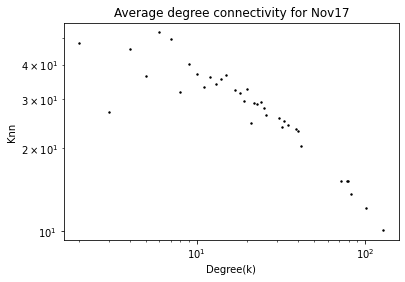

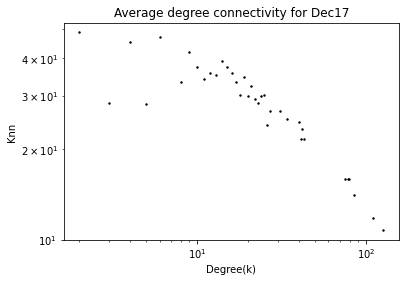

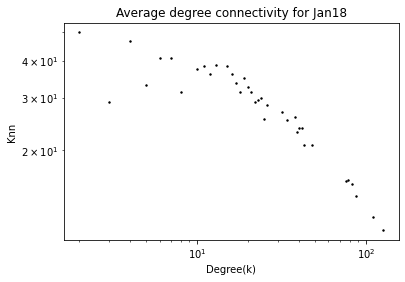

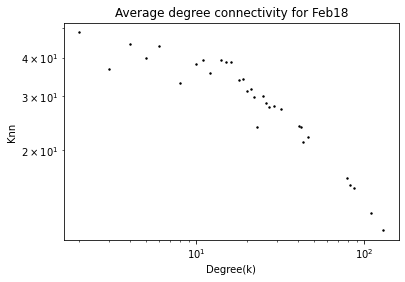

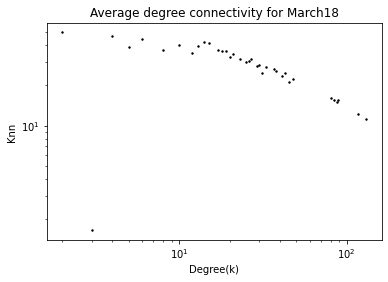

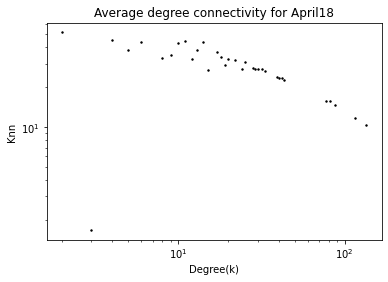

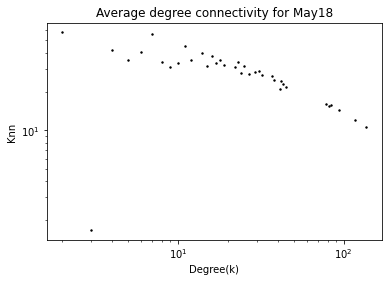

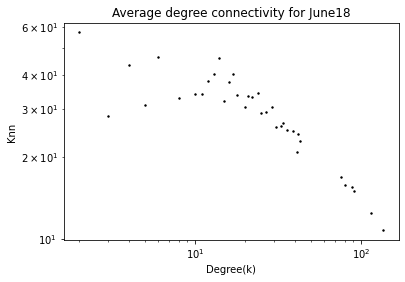

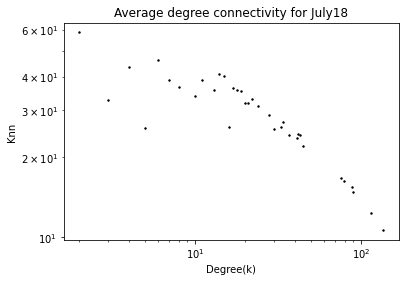

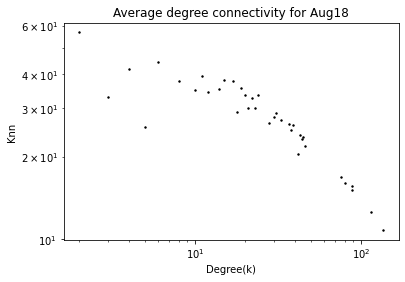

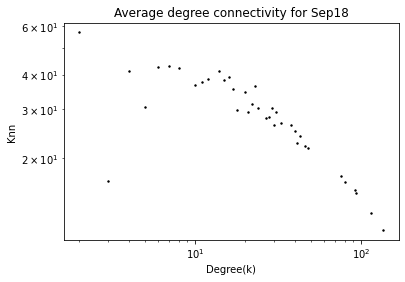

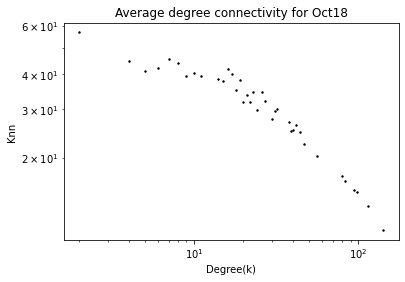

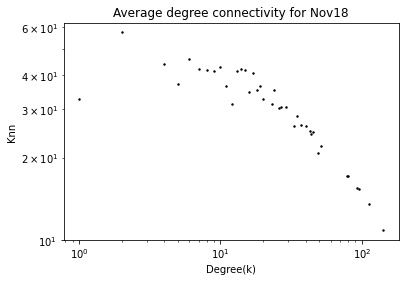

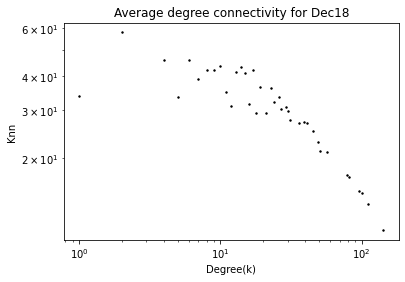

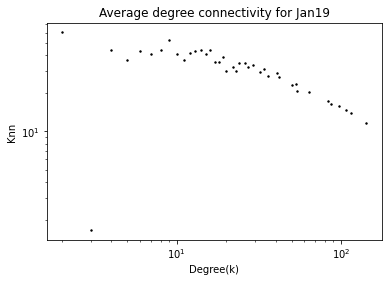

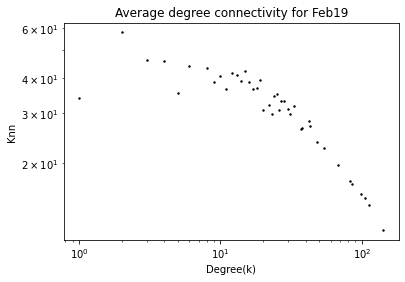

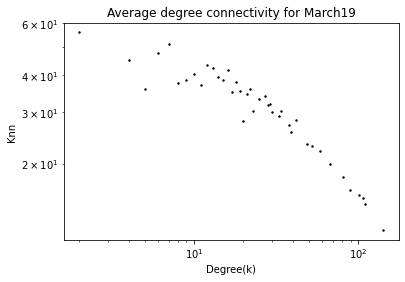

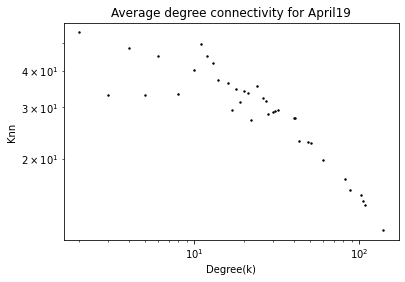

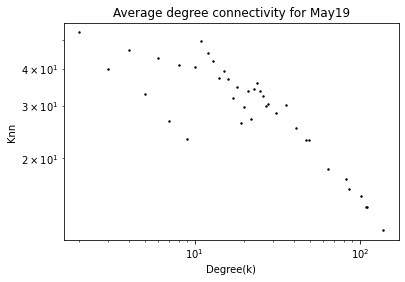

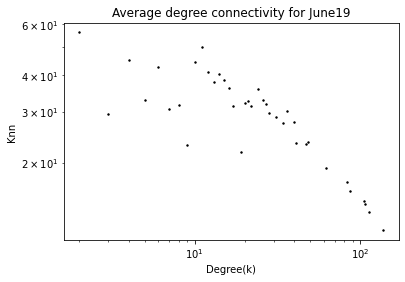

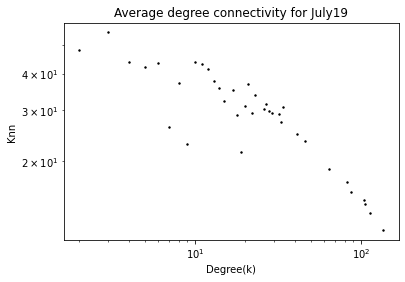

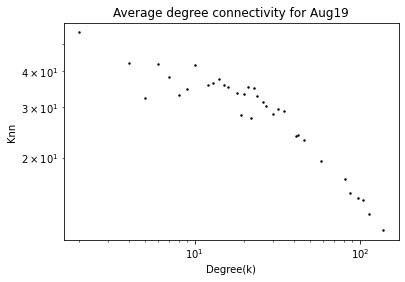

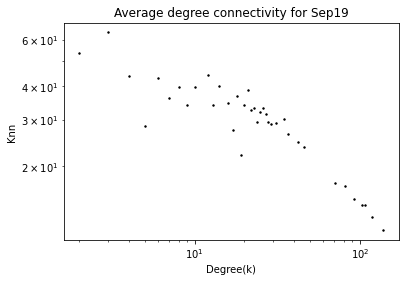

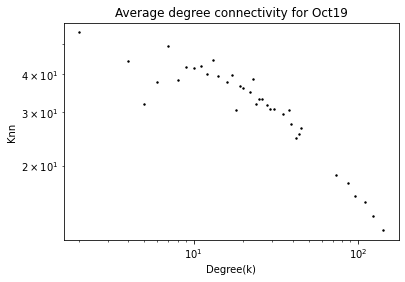

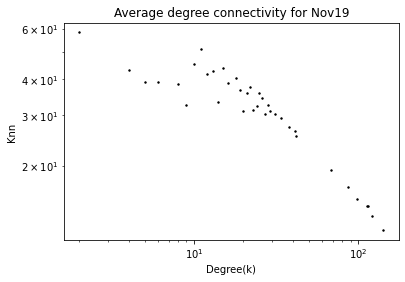

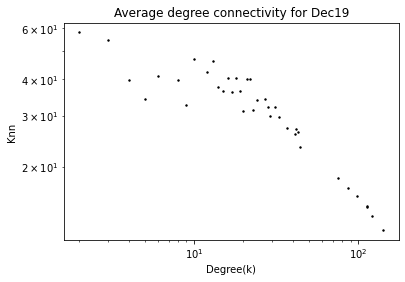

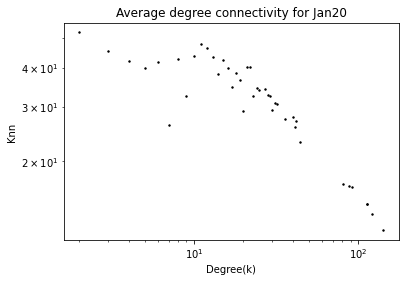

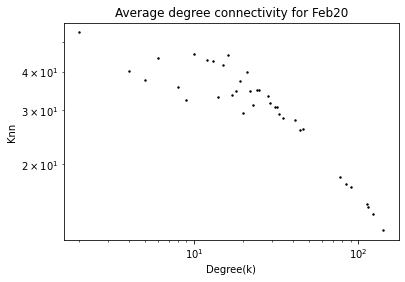

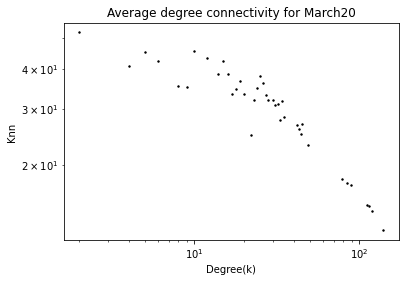

<ipython-input-21-1b7f9b23b4a0>:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig('Output_Files/matplotlib/Knn vs k/' + lbls1[i])


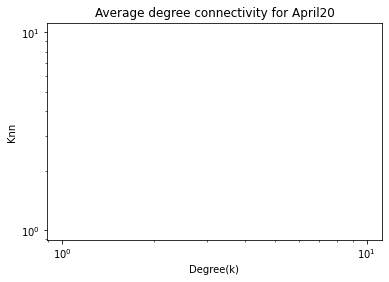

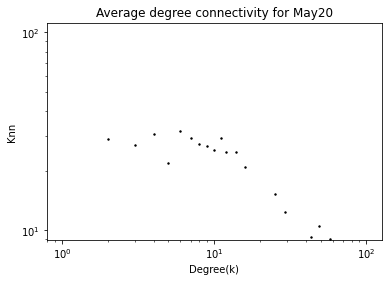

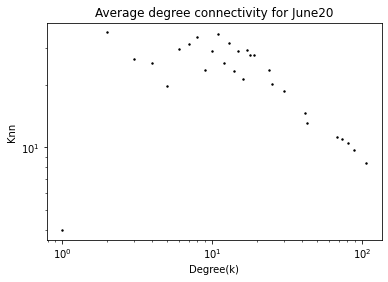

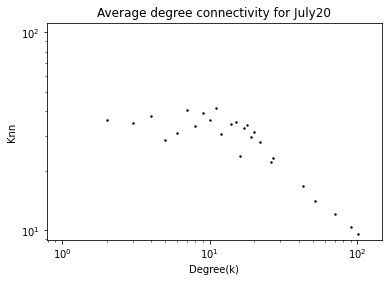

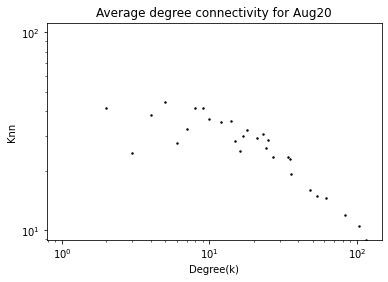

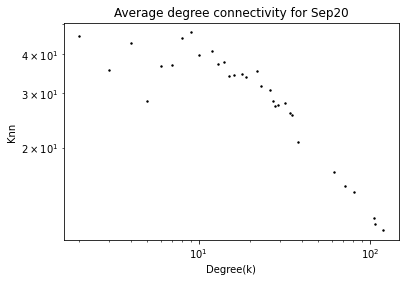

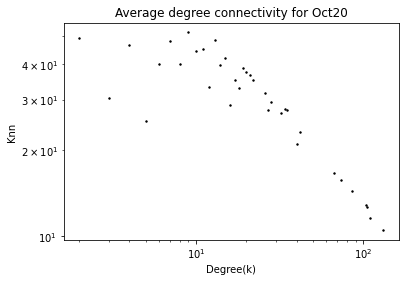

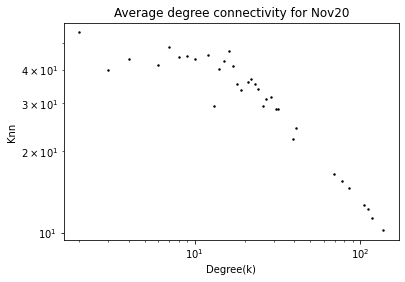

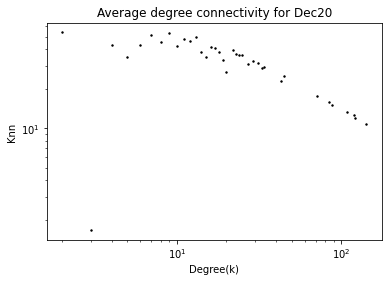

In [21]:
for i in range(len(graphs)):
    G = graphs[i]
    plt.figure()
    plt.title("Average degree connectivity for " + lbls1[i])
    plt.xlabel("Degree(k)")
    plt.ylabel("Knn")
    plt.xscale("log")
    plt.yscale("log")
    #plt.grid(True, which="both")
    k_knn = nx.k_nearest_neighbors(G)
    plt.scatter(k_knn.keys(), k_knn.values(), color="black",  marker="o", s=2)
#     plt.xticks([t for t in range(max(k_knn.keys())+1)])        
    plt.savefig('Output_Files/matplotlib/Knn vs k/' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()